# imports:

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
from ShaniBA.TCR_feature_generation.TCR_feature_generation_functions import *
from SampleLists.SampleFileFunctions import *


MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
done1
stop
done
done


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'27012019'

### import the combined QC file:

In [3]:
# load current QC file from adaptive. this file contains information on all samples until PCR plate 10 (13062018)

file1= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/qcReport_01-27-2019_combined.xlsx'
qcReport=pd.read_excel(file1)
qcReport=qcReport.set_index('Sample Name')

In [4]:
qcReport

Kit UID    Run ID Well Location          Date Posted  \
Sample Name                                                                  
876581BD107            322939  322939_1        A1,A12  2017-06-09 00:00:00   
876581BD107_322939_2   322939  322939_2        A1,A12           09/18/2017   
BD1                    281611  281611_2            G3           08/23/2017   
BD10                   281611  281611_2            E5           08/23/2017   
BD100                  281611  281611_3           F12  2017-07-09 00:00:00   
BD102                  281611  281611_3           G12  2017-07-09 00:00:00   
BD103                  281611  281611_3           H12  2017-07-09 00:00:00   
BD108                  322939  322939_1            B1  2017-06-09 00:00:00   
BD108_322939_2         322939  322939_2            B1           09/18/2017   
BD11                   281611  281611_2            F5           08/23/2017   
BD110                  322939  322939_1            D9  2017-06-09 00:00:00   
BD111                  322939  322939_1        B12,G1  2017-06-09 00:00:00   
BD111_322939_2         322939  322939_2        B12,G1           09/18/2017   
BD112                  322939  322939_1            H1  2017-06-09 00:00:00   
BD112_322939_2         322939  322939_2            H1           09/18/2017   
BD113                  322939  322939_1        A2,C12  2017-06-09 00:00:00   
BD113_322939_2         322939  322939_2        A2,C12           09/18/2017   
BD118                  322939  322939_1            B2  2017-06-09 00:00:00   
BD118_322939_2         322939  322939_2            B2           09/18/2017   
BD119                  322939  322939_1            E9  2017-06-09 00:00:00   
BD12                   281611  281611_2            G5           08/23/2017   
BD120                  322939  322939_1            C2  2017-06-09 00:00:00   
BD120_322939_2         322939  322939_2            C2           09/18/2017   
BD121                  322939  322939_1            D2  2017-06-09 00:00:00   
BD121_322939_2         322939  322939_2            D2           09/18/2017   
BD122                  322939  322939_1            E2  2017-06-09 00:00:00   
BD122_322939_2         322939  322939_2            E2           09/18/2017   
BD123                  322939  322939_1            F2  2017-06-09 00:00:00   
BD123_322939_2         322939  322939_2            F2           09/18/2017   
BD124                  322939  322939_1            G2  2017-06-09 00:00:00   
...                       ...       ...           ...                  ...   
BD946                  343852  343852_1            H7  2018-12-06 00:00:00   
BD960                  343852  343852_1            A1  2018-12-06 00:00:00   
BD961                  343852  343852_1            B1  2018-12-06 00:00:00   
BD981                  343852  343852_1            C1  2018-12-06 00:00:00   
BD990                  343852  343852_1            D1  2018-12-06 00:00:00   
BD991                  343852  343852_1            E1  2018-12-06 00:00:00   
BD995                  343852  343852_1            F1  2018-12-06 00:00:00   
BD997                  343852  343852_1            G1  2018-12-06 00:00:00   
Ravid1_05ug            343852  343852_1            D6  2018-12-06 00:00:00   
Ravid1_1ug             343852  343852_1            F6  2018-12-06 00:00:00   
Ravid2_05ug            343852  343852_1            E6  2018-12-06 00:00:00   
Ravid2_1ug             343852  343852_1            G6  2018-12-06 00:00:00   
MB38_005               343852  343852_4            A9           01/24/2019   
MB38_005_r             343852  343852_4           E10           01/24/2019   
MB38_012               343852  343852_4            B9           01/24/2019   
MB38_015               343852  343852_4            C9           01/24/2019   
MB38_015_r             343852  343852_4           F10           01/24/2019   
MB38_031               343852  343852_4            D9           01/24/2019   
MB38_301               343852  343852_4     

#### add a 'Group' column to categorize samples:

In [5]:
nov16_05=['BD139a_05ug','BD139b_05ug','BD418a_05ug','BD418b_05ug','BD419a_05ug','BD419b_05ug','BD415a_05ug','BD415b_05ug',
           'BD202a_05ug','BD202b_05ug','BD207a_05ug','BD207b_05ug','BD148a_05ug','BD148b_05ug','BD398a_05ug','BD398b_05ug']

In [6]:
nov16_1=['BD139a_1ug','BD139b_1ug','BD207a_1ug','BD207b_1ug','BD415a_1ug','BD415b_1ug','BD418a_1ug','BD418b_1ug']

In [7]:
nov16_05comb=['BD139_05ug','BD418_05ug','BD419_05ug','BD415_05ug','BD202_05ug','BD207_05ug','BD398_05ug','BD148_05ug']

In [8]:
nov16_1comb=['BD139_1ug','BD207_1ug','BD415_1ug','BD418_1ug']

In [9]:
Sep17_1_05comb=['BD111','BD113','BD128','876581BD107']

In [10]:
Sep17_1_05comb=['BD111','BD113','BD128','876581BD107']

In [11]:
Sep17_2_05comb=['BD111_322939_2','BD113_322939_2','BD128_322939_2','876581BD107_322939_2']

In [12]:
plate4_pool1=['BD221','BD222','BD225','BD228','BD229','BD231','BD232','BD233','BD238','BD239','BD245',
              'BD272','BD273','BD275','BD276','BD277','BD292','BD308','BD314','BD316','BD317',
              'BD319','BD321','BD322','BD326','BD328','BD329','BD333','BD334','BD337','BD339','BD340',
              'BD343','BD349','BD351','BD352','BD353','BD354','BD355','BD362','BD363','BD367','BD368',
              'BD369','BD374','BD375','BD376']

#'BD269',

In [13]:
# plate4_pool2=['BD372','BD383','BD392','BD401','BD410','BD417','BD373','BD385,BD393,BD402,
#               BD411,BD418,BD377,BD386,BD395,BD403,BD366,BD419,BD379,BD387,BD396,BD404,BD371,
#               BD420,BD378,BD388,BD397,BD405,BD413,BD421,BD380,BD389,BD398,BD406,BD414,BD422,
#               BD381,BD390,BD399,BD408,BD415,]

# #'BD269',

In [14]:
#define the samples included in plate5_pool1 as the relevant run includes 6 samples that were destroyed (mixed with other 
#samples with the same barcodes from different plate):


plate5_pool1=['BD423','BD431','BD439','BD447','BD460','BD424','BD432','BD440','BD448','BD461','BD425','BD433','BD441',
              'BD463','BD426','BD442','BD465','BD427','BD435','BD443','BD452','BD467','BD412','BD436','BD453',
              'BD468','BD428','BD437','BD454','BD469','BD429','BD438','BD457','BD473','BD476','BD477']

In [15]:
plate8_pnp=["BD101","BD170_2","BD195","BD269_2","BD317_2","BD323","BD327","BD434_2","BD444_2","BD445_2","BD446_2",
            "BD449_2","BD450_2","BD457_2","BD49","BD498","BD504","BD564","BD565","BD566","BD567","BD574_2","BD591",
            "BD617_2","BD618","BD650_2","BD671_2","BD691","BD696_2","BD702_2","BD714_2","BD761_2","BD771","BD8","BD84_2",
            "BD885","BD889","BD898","BD911","BD912","BD913","BD915","BD916","BD917","BD918","BD919","BD920","BD921",
            "BD922","BD923","BD924","BD925","BD926","BD927","BD928","BD929","BD931","BD932","BD933","BD934","BD935",
            "BD936","BD937","BD938","BD939","BD940","BD944","BD945","BD948"]

In [16]:
plate8_cardio=["BD951","BD951","BD952","BD953","BD955","BD956","BD957","BD958","BD959","BD962","BD963","BD964","BD965","BD967",
               "BD971","BD973","BD974","BD978","BD979","BD980","BD982","BD983","BD984","BD985","BD986"]

In [17]:
file_fullPath='%s/Sample files/Plate9samples.xlsx' %MyPath
Plate9samples=gen_py_BD_list(file_fullPath)
Plate9samples[:5]

['BD58', 'BD66', 'BD70', 'BD71', 'BD105']

In [18]:
plate9_pnp=[x for x in Plate9samples if int(x.split('BD')[1])<950]
plate9_cardio=[x for x in Plate9samples if int(x.split('BD')[1])>949]

In [19]:
print len(Plate9samples)
print len(plate9_pnp)
print len(plate9_cardio)

94
28
66


In [20]:
file_fullPath='%s/Sample files/Plate10samples.xlsx' %MyPath
Plate10samples=gen_py_BD_list(file_fullPath)
Plate10samples=Plate10samples+['Ravid1_05ug','Ravid1_1ug','Ravid2_05ug','Ravid2_1ug']
Plate10samples

['BD960',
 'BD961',
 'BD981',
 'BD990',
 'BD991',
 'BD995',
 'BD997',
 'BD1018',
 'BD1019',
 'BD1020',
 'BD1026',
 'BD1030',
 'BD1031',
 'BD1032',
 'BD1033',
 'BD1081',
 'BD1082',
 'BD1083',
 'BD1084',
 'BD1086',
 'BD1087',
 'BD1088',
 'BD1089',
 'BD1090',
 'BD1092',
 'BD1093',
 'BD1094',
 'BD1095',
 'BD1096',
 'BD1097',
 'BD1098',
 'BD1099',
 'BD1021',
 'BD1028',
 'BD1029',
 'BD78',
 'BD104',
 'BD495',
 'BD573',
 'BD577',
 'BD622',
 'BD760',
 'BD143',
 'BD182',
 'BD199',
 'BD551',
 'BD578',
 'BD582',
 'BD648',
 'BD655',
 'BD946',
 'Ravid1_05ug',
 'Ravid1_1ug',
 'Ravid2_05ug',
 'Ravid2_1ug']

In [21]:
plate10_ravid=[]
plate10_pnp=[]
plate10_cardio=[]

for sample in Plate10samples:
    if 'Ravid' in sample:
        plate10_ravid.append(sample)
    else:
        if int(sample.split('BD')[1])<950:
            plate10_pnp.append(sample)
        else:
            plate10_cardio.append(sample)


In [22]:
print len(Plate10samples)
print len(plate10_pnp)
print len(plate10_cardio)
print len(plate10_ravid)

55
16
35
4


In [27]:
Ravid_fullPath='%s/Sample files/RavidSamples.xlsx' %MyPath

df = pd.read_excel(Ravid_fullPath)
RavidSamples = list(df.iloc[:, 0].astype(str))

print len(RavidSamples)
RavidSamples   



18


['MB38_005',
 'MB38_005__r',
 'MB38_012',
 'MB38_015',
 'MB38_015_r',
 'MB38_031',
 'MB38_301',
 'MB38_303B',
 'MB38_306',
 'MB38_309',
 'MB38_316',
 'MB38_321',
 'MB38_325',
 'MB38_325_r',
 'MB38_334',
 'MB38_334_r',
 'Ravid1_05ug',
 'Ravid2_05ug']

In [30]:
qcReport=qcReport[~qcReport.index.str.contains('Control')]


for n in qcReport.index:
    print n
    if n in nov16_05:
        qcReport.loc[n,'Group']='nov16_05'
    elif n in nov16_1:
        qcReport.loc[n,'Group']='nov16_1'
    elif n in nov16_05comb:
        qcReport.loc[n,'Group']='nov16_05comb'
    elif n in nov16_1comb:
        qcReport.loc[n,'Group']='nov16_1comb'
    elif n=='negative':
        qcReport.loc[n,'Group']='negative'
    elif n=='positive':
        qcReport.loc[n,'Group']='positive'
    elif qcReport.loc[n,'Run ID']=='322939_1':
        qcReport.loc[n,'Group']='Sep17_1_05'
    elif qcReport.loc[n,'Run ID']=='322939_2':
        qcReport.loc[n,'Group']='Sep17_2_05'
    elif n in plate4_pool1:
        qcReport.loc[n,'Group']='plate4_pool1'
    elif (qcReport.loc[n,'Run ID']=='322953_2') :
        qcReport.loc[n,'Group']='plate4_pool2'
    elif n in plate5_pool1:
        qcReport.loc[n,'Group']='plate5_pool1'
    elif (qcReport.loc[n,'Run ID']=='322955_2') and ('Control' not in n):
        qcReport.loc[n,'Group']='plate5_pool2'
    elif (qcReport.loc[n,'Run ID']=='323004_1') and ('Control' not in n):
        qcReport.loc[n,'Group']='plate6_run1'
    elif (qcReport.loc[n,'Run ID']=='323004_2') and ('Control' not in n):
        qcReport.loc[n,'Group']='plate6_run2'
    elif (qcReport.loc[n,'Run ID']=='322985_1') and ('Control' not in n):
        qcReport.loc[n,'Group']='plate7'
    elif (qcReport.loc[n,'Run ID']=='322939_3') and ('Control' not in n):
        qcReport.loc[n,'Group']='plate3_1reps'
    elif n in plate8_pnp:
        qcReport.loc[n,'Group']='plate8_pnp'
    elif n in plate8_cardio:
        qcReport.loc[n,'Group']='plate8_cardio'
    elif n in plate9_pnp:
        qcReport.loc[n,'Group']='plate9_pnp'
    elif n in plate9_cardio:
        qcReport.loc[n,'Group']='plate9_cardio'  
    elif n in plate10_pnp:
        qcReport.loc[n,'Group']='plate10_pnp'
    elif n in plate10_cardio:
        qcReport.loc[n,'Group']='plate10_cardio'
    elif n in plate10_ravid:
        qcReport.loc[n,'Group']='plate10_ravid' 
    else:
        qcReport.loc[n,'Group']='Aug17_1_05'
    if n in Sep17_1_05comb:
        qcReport.loc[n,'Group']='Sep17_1_05comb'
    if n in Sep17_2_05comb:
        qcReport.loc[n,'Group']='Sep17_2_05comb'
    if 'IZTR' in n:
        qcReport.loc[n,'Group']='bulkTILs_nov17'
    if n in RavidSamples:
        qcReport.loc[n,'Group']='RavidSamples'
        

876581BD107
876581BD107_322939_2


/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


BD1
BD10
BD100
BD102
BD103
BD108
BD108_322939_2
BD11
BD110
BD111
BD111_322939_2
BD112
BD112_322939_2
BD113
BD113_322939_2
BD118
BD118_322939_2
BD119
BD12
BD120
BD120_322939_2
BD121
BD121_322939_2
BD122
BD122_322939_2
BD123
BD123_322939_2
BD124
BD124_322939_2
BD125
BD125_322939_2
BD126
BD126_322939_2
BD128
BD128_322939_2
BD129
BD13
BD130
BD130_322939_2
BD131
BD131_322939_2
BD132
BD133
BD133_322939_2
BD134
BD134_322939_2
BD136
BD136_322939_2
BD137
BD137_322939_2
BD138
BD139_05ug
BD139_1ug
BD139a_05ug
BD139a_1ug
BD139b_05ug
BD139b_1ug
BD14
BD140
BD140_322939_2
BD141
BD142
BD142_322939_2
BD144
BD144_322939_2
BD145
BD145_322939_2
BD146
BD146_322939_2
BD147
BD147_322939_2
BD148_05ug
BD148a_05ug
BD148b_05ug
BD149
BD149_322939_2
BD150
BD150_322939_2
BD151
BD151_322939_2
BD153
BD153_322939_2
BD154
BD156
BD156_322939_2
BD157
BD157_322939_2
BD158
BD158_322939_2
BD159
BD159_322939_2
BD16
BD160
BD160_322939_2
BD161
BD161_322939_2
BD162
BD163
BD164
BD165
BD166
BD168
BD170
BD171
BD172
BD173
BD175
BD1

In [31]:
qcReport.head()

Kit UID    Run ID Well Location          Date Posted  \
Sample Name                                                                  
876581BD107            322939  322939_1        A1,A12  2017-06-09 00:00:00   
876581BD107_322939_2   322939  322939_2        A1,A12           09/18/2017   
BD1                    281611  281611_2            G3           08/23/2017   
BD10                   281611  281611_2            E5           08/23/2017   
BD100                  281611  281611_3           F12  2017-07-09 00:00:00   

                      Gene Rearrangements  Coverage  % On-target  \
Sample Name                                                        
876581BD107                         70655      14.9    39.982522   
876581BD107_322939_2                74668      17.1    41.370440   
BD1                                 36828     104.1    37.971020   
BD10                                41351     109.2    40.941128   
BD100                               35710      55.1    42.227100   

                              QC Status  putative n reads           Group  
Sample Name                                                                
876581BD107           FAIL_LOW_COVERAGE         1052759.5  Sep17_1_05comb  
876581BD107_322939_2  FAIL_LOW_COVERAGE         1276822.8  Sep17_2_05comb  
BD1                                PASS         3833794.8      Aug17_1_05  
BD10                               PASS         4515529.2      Aug17_1_05  
BD100                              PASS         1967621.0      Aug17_1_05

## Calculate QC parameters for the different sequencing runs:
for the summarizing GoogleSheet and the presentation:

In [32]:
qcReport.groupby('Group').mean()

Kit UID  Gene Rearrangements    Coverage  % On-target  \
Group                                                                    
Aug17_1_05      288075.5         31175.487500  103.487500    36.695163   
RavidSamples    343852.0          2118.588235  311.000000     6.012649   
Sep17_1_05      322939.0         26976.094118   30.358824    35.841251   
Sep17_1_05comb  322939.0         73376.000000   17.150000    40.175689   
Sep17_2_05      322939.0         33581.153846   32.182051    37.765815   
Sep17_2_05comb  322939.0         77198.250000   22.050000    41.169187   
bulkTILs_nov17  322985.0         28139.250000   20.500000    22.731174   
negative        281611.0           454.000000   89.900000     3.001188   
nov16_05        281611.0         33712.750000   33.406250    54.600820   
nov16_05comb    281611.0         64005.875000   33.400000    54.596271   
nov16_1         281611.0         52623.625000   22.462500    59.951130   
nov16_1comb     281611.0         99313.500000   22.450000    60.020881   
plate10_cardio  343852.0         20503.628571   87.808571    39.870245   
plate10_pnp     343852.0         22722.875000   65.812500    37.735295   
plate10_ravid   343852.0          9076.000000  111.650000    26.677945   
plate3_1reps    322939.0         48048.750000   16.850000    44.625607   
plate4_pool1    322953.0         18377.595745   84.831915    35.190162   
plate4_pool2    322953.0         16519.152174  100.386957    33.269591   
plate5_pool1    322955.0         16787.805556  115.397222    33.311836   
plate5_pool2    322955.0         16511.604167  102.620833    33.365930   
plate6_run1     323004.0         17494.127660   42.286170    36.912868   
plate6_run2     323004.0         17633.031915   50.007447    37.100129   
plate7          322985.0         24862.900000   31.235556    42.176043   
plate8_cardio   322954.0         14376.333333   62.050000    31.533378   
plate8_pnp      322954.0         25169.426471   51.051471    39.716022   
plate9_cardio   323001.0         15136.106061   46.210606    35.050935   
plate9_pnp      323001.0         19941.360000   42.732000    38.852580   
positive        281611.0           637.000000   21.300000     0.689569   

                putative n reads  
Group                             
Aug17_1_05          2.917346e+06  
RavidSamples        5.851499e+05  
Sep17_1_05          7.157259e+05  
Sep17_1_05comb      1.144407e+06  
Sep17_2_05          9.502224e+05  
Sep17_2_05comb      1.577187e+06  
bulkTILs_nov17      5.329575e+05  
negative            4.081460e+04  
nov16_05            1.072598e+06  
nov16_05comb        2.029176e+06  
nov16_1             1.134474e+06  
nov16_1comb         2.127677e+06  
plate10_cardio      1.656238e+06  
plate10_pnp         1.302288e+06  
plate10_ravid       1.013440e+06  
plate3_1reps        7.439556e+05  
plate4_pool1        1.345701e+06  
plate4_pool2        1.583610e+06  
plate5_pool1        1.803874e+06  
plate5_pool2        1.547787e+06  
plate6_run1         6.754823e+05  
plate6_run2         8.030884e+05  
plate7              7.355501e+05  
plate8_cardio       7.823845e+05  
plate8_pnp          1.170026e+06  
plate9_cardio       6.566562e+05  
plate9_pnp          7.350631e+05  
positive            1.356810e+04

#### now I group the samples according to the sequencing runs:

In [33]:
# REMOVE POSITIVE AND GENATIVE SAMPLES FROM CALCULATIONS
qcReportNoControls=qcReport[(~qcReport.index.str.contains('positive'))&(~qcReport.index.str.contains('negative'))]
qcReportNoControls=qcReportNoControls[qcReportNoControls.index!='BD269']

In [34]:
print len(qcReport)
print len(qcReportNoControls)

966
962


#### 4/11/16:

In [35]:
NovRun=qcReportNoControls[(qcReportNoControls['Group'].str.contains('nov16'))&(qcReportNoControls['Run ID']=='281611_3')]
print len(NovRun)

24


In [36]:
NovRun.mean()

Kit UID                2.816110e+05
Well Location                   NaN
Gene Rearrangements    4.001638e+04
Coverage               2.975833e+01
% On-target            5.638426e+01
putative n reads       1.093223e+06
dtype: float64

#### re-analysis of novermber run - analysing duplicated together

In [37]:
reanalysis=qcReportNoControls[qcReportNoControls['Run ID']=='281611_1']
print len(reanalysis)

12


In [38]:
reanalysis.mean()

Kit UID                2.816110e+05
Gene Rearrangements    7.577508e+04
Coverage               2.975000e+01
% On-target            5.640447e+01
putative n reads       2.062010e+06
dtype: float64

#### aug17 - successful run  of plate 2 pool1 

In [39]:
Aug17_1_05=qcReportNoControls[qcReportNoControls['Run ID']=='281611_2']
print len(Aug17_1_05)

29


In [40]:
Aug17_1_05.mean()

Kit UID                2.816110e+05
Gene Rearrangements    3.184214e+04
Coverage               1.269103e+02
% On-target            3.668584e+01
putative n reads       3.704447e+06
dtype: float64

#### Aug17- plate 2 pool2

In [41]:
plate2pool2=qcReportNoControls[(~qcReportNoControls['Group'].str.contains('nov16'))&(qcReportNoControls['Run ID']=='281611_3')]
print len(plate2pool2)

39


In [42]:
plate2pool2.mean()

Kit UID                2.816110e+05
Gene Rearrangements    3.403736e+04
Coverage               8.006410e+01
% On-target            3.924455e+01
putative n reads       2.466926e+06
dtype: float64

#### Sep17 - plate 3 - 96 samples

In [43]:
plate3=qcReportNoControls[qcReportNoControls['Run ID']=='322939_1']
print len(plate3)

89


In [44]:
plate3.mean()


Kit UID                322939.000000
Gene Rearrangements     29061.483146
Coverage                   29.765169
% On-target                36.036057
putative n reads       734992.428090
dtype: float64

Sep17-plate3rerun1-48 samples

In [45]:
plate3rerun1=qcReportNoControls[qcReportNoControls['Run ID']=='322939_2']
print len(plate3rerun1)

42


In [46]:
plate3rerun1.mean()

Kit UID                3.229390e+05
Gene Rearrangements    3.853007e+04
Coverage               3.149286e+01
% On-target            3.898719e+01
putative n reads       1.032462e+06
dtype: float64

Oct17-plate4_pool1-48 samples

In [47]:
plate4pool1=qcReportNoControls[qcReportNoControls['Run ID']=='322953_1']
print len(plate4pool1)

47


In [48]:
plate4pool1.mean()

Kit UID                3.229530e+05
Gene Rearrangements    1.837760e+04
Coverage               8.483191e+01
% On-target            3.519016e+01
putative n reads       1.345701e+06
dtype: float64

oct17-plate4 pool2 - 46 samples

In [49]:
plate4pool2=qcReportNoControls[qcReportNoControls['Group']=='plate4_pool2']
print len(plate4pool2)

46


In [50]:
plate4pool2.mean()

Kit UID                3.229530e+05
Gene Rearrangements    1.651915e+04
Coverage               1.003870e+02
% On-target            3.326959e+01
putative n reads       1.583610e+06
dtype: float64

##### oct17-plate5 pool1 - 42 samples

In [51]:
plate5pool1=qcReportNoControls[qcReportNoControls['Group']=='plate5_pool1']
print len(plate5pool1)

36


In [52]:
plate5pool1.mean()

Kit UID                3.229550e+05
Gene Rearrangements    1.678781e+04
Coverage               1.153972e+02
% On-target            3.331184e+01
putative n reads       1.803874e+06
dtype: float64

##### Nov17-plate5 pool2 - 48 samples

In [53]:
plate5pool2=qcReportNoControls[qcReportNoControls['Group']=='plate5_pool2']
print len(plate5pool2)

48


In [54]:
plate5pool2.mean()

Kit UID                3.229550e+05
Gene Rearrangements    1.651160e+04
Coverage               1.026208e+02
% On-target            3.336593e+01
putative n reads       1.547787e+06
dtype: float64

###### Nov17-plate6-all plate-run1 - 96 samples

In [55]:
plate6run1=qcReportNoControls[qcReportNoControls['Group']=='plate6_run1']
print len(plate6run1)

94


In [56]:
plate6run1.mean()

Kit UID                323004.000000
Gene Rearrangements     17494.127660
Coverage                   42.286170
% On-target                36.912868
putative n reads       675482.343617
dtype: float64

###### Nov17-plate6-all plate-run2- 96 samples

In [57]:
plate6run2=qcReportNoControls[qcReportNoControls['Group']=='plate6_run2']
print len(plate6run2)

94


In [58]:
plate6run2.mean()

Kit UID                323004.000000
Gene Rearrangements     17633.031915
Coverage                   50.007447
% On-target                37.100129
putative n reads       803088.427660
dtype: float64

###### Nov17-plate7-all plate but samuels samples-90 samples

In [59]:
plate7=qcReportNoControls[qcReportNoControls['Group']=='plate7']
print len(plate7)

90


In [60]:
plate7.mean()

Kit UID                322985.000000
Gene Rearrangements     24862.900000
Coverage                   31.235556
% On-target                42.176043
putative n reads       735550.097778
dtype: float64

###### Nov17-plate7-samuels samples-4 samples

In [61]:
bulkTILs_nov17=qcReportNoControls[qcReportNoControls['Group']=='bulkTILs_nov17']
print len(bulkTILs_nov17)

4


In [62]:
bulkTILs_nov17.mean()

Kit UID                322985.000000
Gene Rearrangements     28139.250000
Coverage                   20.500000
% On-target                22.731174
putative n reads       532957.525000
dtype: float64

##### Nov17-plate3-samples reanalyzed as 1 replicate only-4 samples

In [63]:
plate3_1reps=qcReportNoControls[qcReportNoControls['Group']=='plate3_1reps']
print len(plate3_1reps)

4


In [64]:
plate3_1reps.mean()

Kit UID                322939.000000
Gene Rearrangements     48048.750000
Coverage                   16.850000
% On-target                44.625607
putative n reads       743955.550000
dtype: float64

Feb18-plate8-94 samples

In [65]:
plate8=qcReportNoControls[qcReportNoControls['Run ID']=='322954_2']
print len(plate8)

93


In [66]:
plate8.mean()

Kit UID                3.229540e+05
Gene Rearrangements    2.226859e+04
Coverage               5.427957e+01
% On-target            3.754631e+01
putative n reads       1.070951e+06
dtype: float64

Mar18-plate9-94 samples

In [67]:
plate9=qcReportNoControls[qcReportNoControls['Run ID']=='323001_1']
print len(plate9)

94


In [68]:
plate9.mean()

Kit UID                323001.000000
Gene Rearrangements     16470.872340
Coverage                   45.041489
% On-target                36.096386
putative n reads       676879.647872
dtype: float64

June 18-plate10-55 samples

In [69]:
plate10=qcReportNoControls[qcReportNoControls['Run ID']=='343852_1']
print len(plate10)

55


In [70]:
plate10.mean()

Kit UID                3.438520e+05
Gene Rearrangements    2.017838e+04
Coverage               8.884182e+01
% On-target            3.790194e+01
putative n reads       1.520722e+06
dtype: float64

Jan 19-Merck project-16 samples

In [72]:
Merck=qcReportNoControls[qcReportNoControls['Run ID']=='343852_4']
print len(Merck)

16


In [73]:
Merck.mean()

Kit UID                343852.000000
Gene Rearrangements      2019.750000
Coverage                  308.206250
% On-target                 5.521203
putative n reads       522767.825000
dtype: float64

In [74]:
qcReportNoControls.groupby('Run ID').mean()

Kit UID  Gene Rearrangements    Coverage  % On-target  \
Run ID                                                             
281611_1  281611.0         75775.083333   29.750000    56.404475   
281611_2  281611.0         31842.137931  126.910345    36.685839   
281611_3  281611.0         36315.079365   60.900000    45.773964   
322939_1  322939.0         29061.483146   29.765169    36.036057   
322939_2  322939.0         38530.071429   31.492857    38.987193   
322939_3  322939.0         48048.750000   16.850000    44.625607   
322953_1  322953.0         18377.595745   84.831915    35.190162   
322953_2  322953.0         16519.152174  100.386957    33.269591   
322954_2  322954.0         22268.591398   54.279570    37.546307   
322955_1  322955.0         18465.285714  120.419048    32.842322   
322955_2  322955.0         16511.604167  102.620833    33.365930   
322985_1  322985.0         25002.319149   30.778723    41.348602   
323001_1  323001.0         16470.872340   45.041489    36.096386   
323004_1  323004.0         17494.127660   42.286170    36.912868   
323004_2  323004.0         17633.031915   50.007447    37.100129   
343852_1  343852.0         20178.381818   88.841818    37.901936   
343852_4  343852.0          2019.750000  308.206250     5.521203   

          putative n reads  
Run ID                      
281611_1      2.062010e+06  
281611_2      3.704447e+06  
281611_3      1.943611e+06  
322939_1      7.349924e+05  
322939_2      1.032462e+06  
322939_3      7.439556e+05  
322953_1      1.345701e+06  
322953_2      1.583610e+06  
322954_2      1.070951e+06  
322955_1      2.149651e+06  
322955_2      1.547787e+06  
322985_1      7.269291e+05  
323001_1      6.768796e+05  
323004_1      6.754823e+05  
323004_2      8.030884e+05  
343852_1      1.520722e+06  
343852_4      5.227678e+05

In [75]:
qcReport.groupby('Group').describe()['Coverage','count'].sum()

966.0

In [76]:
for n in qcReport.index:
    if n in NovRun.index:
        qcReport.loc[n,'SeqRun']='Plate1Nov16'
    elif n in reanalysis.index:
        qcReport.loc[n,'SeqRun']='Plate1DupAnalysis'
    elif n in Aug17_1_05.index:
        qcReport.loc[n,'SeqRun']='Plate2pool1'
    elif n in plate2pool2.index:
        qcReport.loc[n,'SeqRun']='Plate2pool2'
    elif n in plate3.index:
        qcReport.loc[n,'SeqRun']='Plate3'
    elif n in plate3rerun1.index:
        qcReport.loc[n,'SeqRun']='Plate3rerun1'
    elif n in plate4pool1.index:
        qcReport.loc[n,'SeqRun']='plate4_pool1'
    elif n in plate4pool2.index:
        qcReport.loc[n,'SeqRun']='plate4_pool2'
    elif n in plate5pool1.index:
        qcReport.loc[n,'SeqRun']='plate5_pool1'
    elif n in plate5pool2.index:
        qcReport.loc[n,'SeqRun']='plate5_pool2'
    elif n in plate6run1.index:
        qcReport.loc[n,'SeqRun']='plate6run1'
    elif n in plate6run2.index:
        qcReport.loc[n,'SeqRun']='plate6run2'
    elif n in plate7.index:
        qcReport.loc[n,'SeqRun']='plate7'
    elif n in bulkTILs_nov17.index:
        qcReport.loc[n,'SeqRun']='bulkTILs_nov17'
    elif n in plate3_1reps.index:
        qcReport.loc[n,'SeqRun']='plate3_1reps'
    elif n in plate8.index:
        qcReport.loc[n,'SeqRun']='plate8'
    elif n in plate9.index:
        qcReport.loc[n,'SeqRun']='plate9'
    elif n in plate10.index:
        qcReport.loc[n,'SeqRun']='plate10'
    elif n in Merck:
        qcReport.loc[n,'SeqRun']='Merck'
        

/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [77]:
qcReport.head()

Kit UID    Run ID Well Location          Date Posted  \
Sample Name                                                                  
876581BD107            322939  322939_1        A1,A12  2017-06-09 00:00:00   
876581BD107_322939_2   322939  322939_2        A1,A12           09/18/2017   
BD1                    281611  281611_2            G3           08/23/2017   
BD10                   281611  281611_2            E5           08/23/2017   
BD100                  281611  281611_3           F12  2017-07-09 00:00:00   

                      Gene Rearrangements  Coverage  % On-target  \
Sample Name                                                        
876581BD107                         70655      14.9    39.982522   
876581BD107_322939_2                74668      17.1    41.370440   
BD1                                 36828     104.1    37.971020   
BD10                                41351     109.2    40.941128   
BD100                               35710      55.1    42.227100   

                              QC Status  putative n reads           Group  \
Sample Name                                                                 
876581BD107           FAIL_LOW_COVERAGE         1052759.5  Sep17_1_05comb   
876581BD107_322939_2  FAIL_LOW_COVERAGE         1276822.8  Sep17_2_05comb   
BD1                                PASS         3833794.8      Aug17_1_05   
BD10                               PASS         4515529.2      Aug17_1_05   
BD100                              PASS         1967621.0      Aug17_1_05   

                            SeqRun  
Sample Name                         
876581BD107                 Plate3  
876581BD107_322939_2  Plate3rerun1  
BD1                    Plate2pool1  
BD10                   Plate2pool1  
BD100                  Plate2pool2

## Adding more run parameters:
from the Sample OverView analysis of the analyzer

In [78]:
# loading the sampleOverview information of all samples until PCR plate Merck (270119)
file2= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverview_01-27-2019_combined.xlsx'
SampleOverview=pd.read_excel(file2)
SampleOverview.set_index('sample_name', inplace=True)

In [79]:
SampleOverview.loc['BD107_1rep',:]

total_templates                55896
total_reads                       na
fraction_productive           0.8162
total_rearrangements           30879
productive_rearrangements      25349
productive_clonality           0.085
max_productive_frequency     1.49051
outofframe_rearrangements       5124
stop_rearrangements              406
outofframe_templates            9307
stop_templates                   967
sample_clonality              0.0868
sample_entropy                 13.62
productive_entropy           13.3859
max_frequency                1.21654
Name: BD107_1rep, dtype: object

In [80]:
SampleOverviewAndQC=pd.merge(SampleOverview,qcReport,how='left', left_index=True, right_index=True)

In [81]:
SampleOverviewAndQC

total_templates total_reads  fraction_productive  \
876581BD107                     70655          na             0.812900   
876581BD107_322939_2            74668          na             0.812300   
BD1                             36828          na             0.809100   
BD10                            41351          na             0.803900   
BD100                           35710          na             0.795000   
BD1000                          19682          na             0.811808   
BD1001                          14970          na             0.792118   
BD1002                           5528          na             0.844790   
BD1003                          13399          na             0.774162   
BD1004                          15622          na             0.831776   
BD1005                          15474          na             0.826418   
BD1006                          14504          na             0.836114   
BD1007                          12411          na             0.854242   
BD1008                           9701          na             0.772085   
BD1009                          20851          na             0.820296   
BD101                           16399          na             0.704250   
BD1010                           6937          na             0.765749   
BD1011                          29041          na             0.811887   
BD1012                           7953          na             0.798064   
BD1013                          13691          na             0.749909   
BD1014                           3819          na             0.846819   
BD1015                          20733          na             0.813534   
BD1016                          11974          na             0.796643   
BD1017                           9423          na             0.804096   
BD1018                           9466          na             0.782168   
BD1019                          11494          na             0.799374   
BD102                           38332          na             0.821400   
BD1020                          16430          na             0.844187   
BD1021                           7548          na             0.828961   
BD1026                          23567          na             0.737217   
...                               ...         ...                  ...   
BD999                            9098          na             0.839965   
IZTR_12_1                       16952          na             0.702000   
IZTR_12_2                       16078          na             0.708900   
IZTR_32_1                       40197          na             0.705800   
IZTR_32_2                       39330          na             0.698900   
MB38_005                         7122          na             0.847093   
MB38_005_r                       6766          na             0.850724   
MB38_012                          849          na             0.799764   
MB38_015                         1161          na             0.794143   
MB38_015_r                       1142          na             0.783713   
MB38_031                          417          na             0.757794   
MB38_301                           38          na             0.368421   
MB38_303B                         158          na             0.677215   
MB38_306                         4312          na             0.794527   
MB38_309                          194          na             0.706186   
MB38_316                         1104          na             0.823370   
MB38_321                         3986          na             0.770447   
MB38_325                         1882          na             0.759830   
MB38_325_r                       1985          na             0.756675   
MB38_334                          640          na             0.792188   
MB38_334_r                        560          na             0.828571   
NegativeControl                    26          na             0.346154   
PositiveControl           

In [82]:
file2= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverviewAndQC.xlsx'
SampleOverviewAndQC.to_excel(file2)

In [83]:
SampleOverviewAndQC.columns.values

array([u'total_templates', u'total_reads', u'fraction_productive',
       u'total_rearrangements', u'productive_rearrangements',
       u'productive_clonality', u'max_productive_frequency',
       u'outofframe_rearrangements', u'stop_rearrangements',
       u'outofframe_templates', u'stop_templates', u'sample_clonality',
       u'sample_entropy', u'productive_entropy', u'max_frequency',
       u'Kit UID', u'Run ID', u'Well Location', u'Date Posted',
       u'Gene Rearrangements', u'Coverage', u'% On-target', u'QC Status',
       u'putative n reads', 'Group', 'SeqRun'], dtype=object)

In [84]:
SampleOverviewAndQC[SampleOverviewAndQC.index=='BD64']

Empty DataFrame
Columns: [total_templates, total_reads, fraction_productive, total_rearrangements, productive_rearrangements, productive_clonality, max_productive_frequency, outofframe_rearrangements, stop_rearrangements, outofframe_templates, stop_templates, sample_clonality, sample_entropy, productive_entropy, max_frequency, Kit UID, Run ID, Well Location, Date Posted, Gene Rearrangements, Coverage, % On-target, QC Status, putative n reads, Group, SeqRun]
Index: []

[0 rows x 26 columns]

In [85]:
columns_QC=['Coverage', '% On-target','putative n reads']
columns_samplesOverview=['total_templates','total_rearrangements','fraction_productive','max_frequency','sample_clonality',
                         'sample_entropy', 'productive_clonality','productive_entropy']

In [86]:
print len(columns_samplesOverview)

8


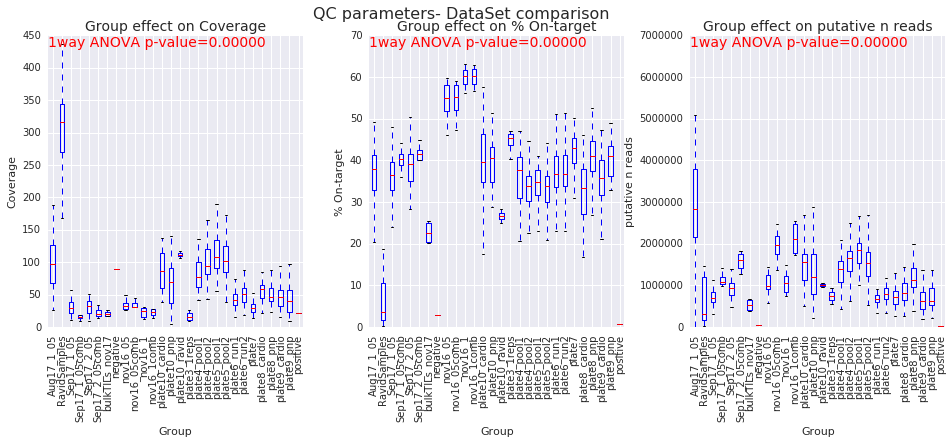

In [87]:
fig1, (ax1, ax2,ax3)=plt.subplots(nrows=1,ncols=3, figsize=(14,5),sharex=True, sharey=False)
fig1.suptitle('QC parameters- DataSet comparison', fontsize=16)
axList=[ax1,ax2,ax3]
count=0

for column in columns_QC:
    fig,ax,s,p=check_category_effect_on_PredictionR(df=SampleOverviewAndQC,category='Group',PredictionR=column,ax=axList[count])
    count=count+1
    
fig1.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/QC parameters- DataSet comparison_%s' %cdate
fig1.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

In [93]:
GroupList=['RavidSamples','plate10_ravid','plate10_pnp','bulkTILs_nov17']
SampleOverviewAndQC_spec=SampleOverviewAndQC[SampleOverviewAndQC['Group'].isin(GroupList)]
print SampleOverviewAndQC_spec.shape
print SampleOverviewAndQC.shape

(39, 26)
(969, 26)


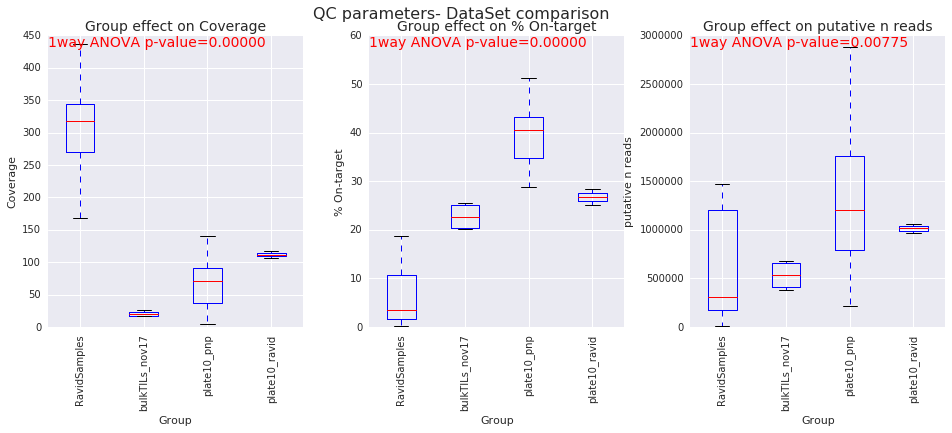

In [94]:
fig1, (ax1, ax2,ax3)=plt.subplots(nrows=1,ncols=3, figsize=(14,5),sharex=True, sharey=False)
fig1.suptitle('QC parameters- DataSet comparison', fontsize=16)
axList=[ax1,ax2,ax3]
count=0

for column in columns_QC:
    fig,ax,s,p=check_category_effect_on_PredictionR(df=SampleOverviewAndQC_spec,category='Group',PredictionR=column,ax=axList[count])
    count=count+1
    
fig1.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/QC parameters- DataSet comparison_%s' %cdate
fig1.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

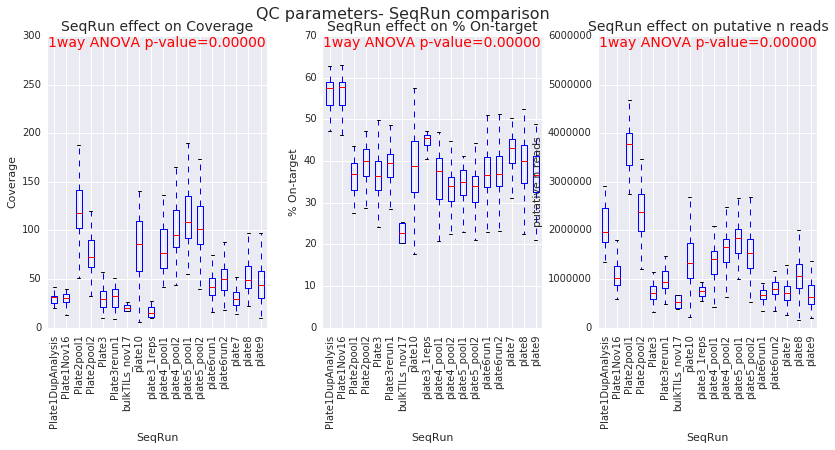

In [88]:
fig2, (ax1, ax2,ax3)=plt.subplots(nrows=1,ncols=3, figsize=(12,5),sharex=True, sharey=False)
fig2.suptitle('QC parameters- SeqRun comparison', fontsize=16)
axList=[ax1,ax2,ax3]
count=0

for column in columns_QC:
    fig,ax,s,p=check_category_effect_on_PredictionR(df=SampleOverviewAndQC,category='SeqRun',PredictionR=column,ax=axList[count])
    count=count+1
    
fig2.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/QC parameters- SeqRun comparison_%s' %cdate
fig2.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

total_templates
total_rearrangements
fraction_productive
max_frequency
sample_clonality
sample_entropy
productive_clonality
productive_entropy


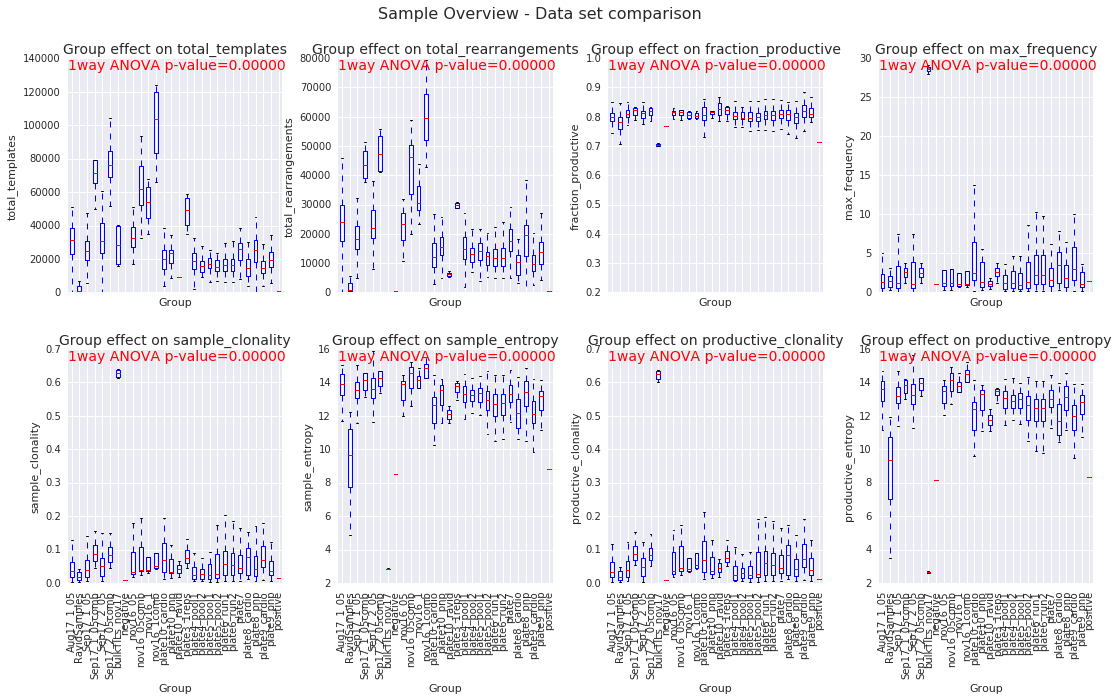

In [89]:
fig2, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8))= plt.subplots(nrows=2,ncols=4, figsize=(16,9),sharex=True, sharey=False)
fig2.suptitle('Sample Overview - Data set comparison', fontsize=16)
axList=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0

for column in columns_samplesOverview:
    print column
    fig,ax,s,p=check_category_effect_on_PredictionR(df=SampleOverviewAndQC,category='Group',PredictionR=column,ax=axList[count])
    count=count+1
    
fig2.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/Sample Overview - data set comparison %s' %cdate
fig2.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

total_templates
total_rearrangements
fraction_productive
max_frequency
sample_clonality
sample_entropy
productive_clonality
productive_entropy


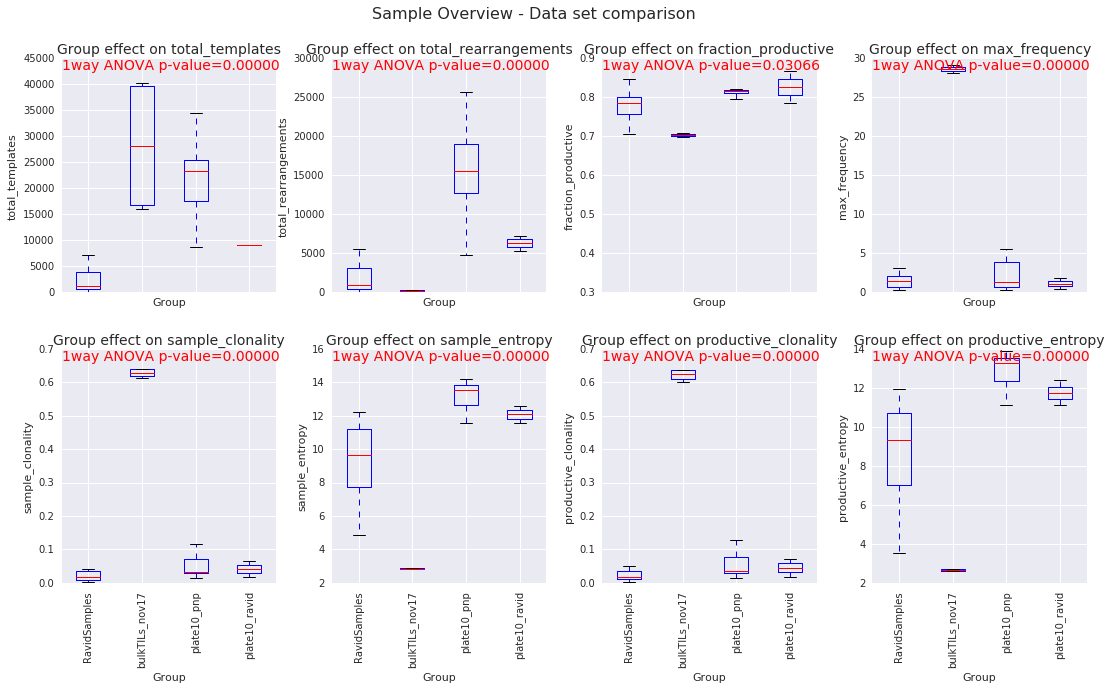

In [95]:
fig2, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8))= plt.subplots(nrows=2,ncols=4, figsize=(16,9),sharex=True, sharey=False)
fig2.suptitle('Sample Overview - Data set comparison', fontsize=16)
axList=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0

for column in columns_samplesOverview:
    print column
    fig,ax,s,p=check_category_effect_on_PredictionR(df=SampleOverviewAndQC_spec,category='Group',PredictionR=column,ax=axList[count])
    count=count+1
    
fig2.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/Sample Overview - data set comparison %s' %cdate
fig2.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

total_templates
total_rearrangements
fraction_productive
max_frequency
sample_clonality
sample_entropy
productive_clonality
productive_entropy


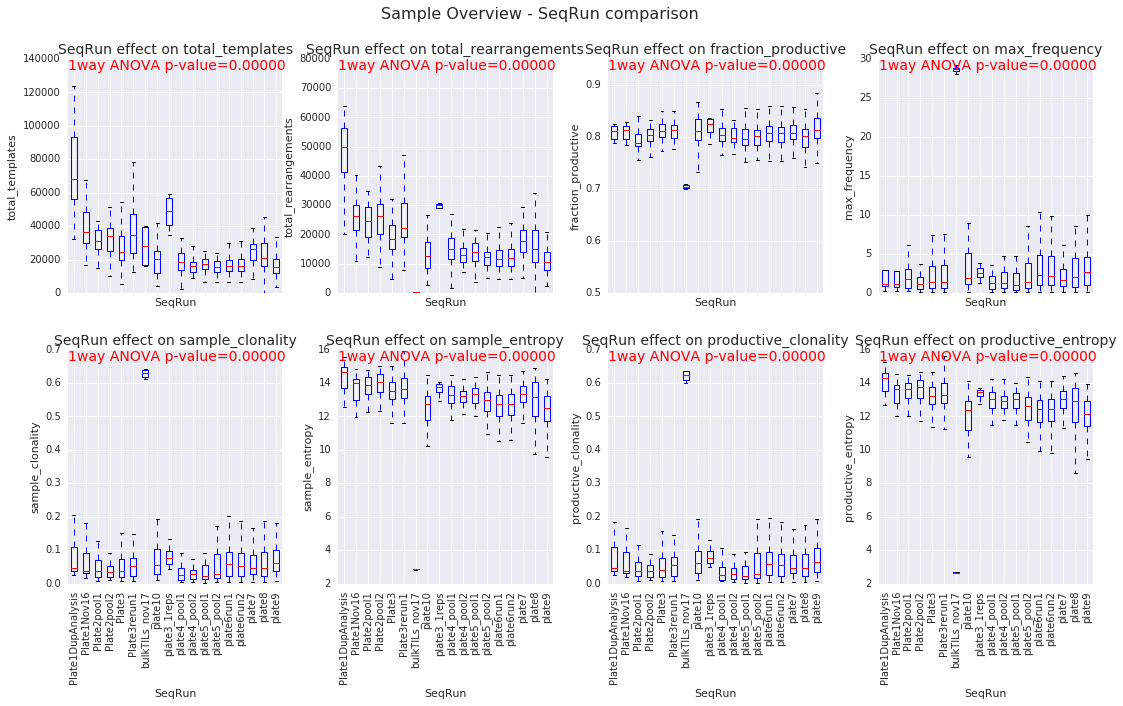

In [90]:
fig2, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8))= plt.subplots(nrows=2,ncols=4, figsize=(16,9),sharex=True, sharey=False)
fig2.suptitle('Sample Overview - SeqRun comparison', fontsize=16)
axList=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0

for column in columns_samplesOverview:
    print column
    fig,ax,s,p=check_category_effect_on_PredictionR(df=SampleOverviewAndQC,category='SeqRun',PredictionR=column,ax=axList[count])
    count=count+1
    
fig2.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/Sample Overview - SeqRun set comparison %s' %cdate
fig2.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

In [91]:
file3= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverview_adaptiveCohort.xlsx'
SampleOverviewAdaptive=pd.read_excel(file3)

IOError: [Errno 2] No such file or directory: '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverview_adaptiveCohort.xlsx'

In [102]:
SampleOverviewAdaptive.set_index('sample_name',inplace=True)

NameError: name 'SampleOverviewAdaptive' is not defined

In [ ]:
SampleOverviewAdaptive

In [ ]:
SampleOverviewAndQC.head()

In [ ]:
SampleOverviewAndQC.head()

In [ ]:
AllSamplesOverview=pd.concat([SampleOverviewAndQC,SampleOverviewAdaptive])

In [ ]:
AllSamplesOverview=AllSamplesOverview[AllSamplesOverview.index.notnull()]

In [ ]:
for n in AllSamplesOverview.index:
    if 'HIP' in n:
        AllSamplesOverview.loc[n,'Group']='Adaptive'
        AllSamplesOverview.loc[n,'SeqRun']='Adaptive'

In [ ]:
#AllSamplesOverview=AllSamplesOverview.dropna()
fig3, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8))= plt.subplots(nrows=2,ncols=4, figsize=(16,9),sharex=True, sharey=False)
fig3.suptitle('Sample Overview - Data set comparison INCLUDING ADAPTIVE DATA', fontsize=16)
axList=[ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0

for column in columns_samplesOverview[1:]:
    print column
    fig,ax,s,p=check_category_effect_on_PredictionR(df=AllSamplesOverview,category='Group',PredictionR=column,ax=axList[count])
    count=count+1
    
fig3.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/Sample Overview-Data set comparison INCLUDING ADAPTIVE DATA_%s' %cdate
fig3.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

In [ ]:
#AllSamplesOverview=AllSamplesOverview.dropna()
fig3, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8))= plt.subplots(nrows=2,ncols=4, figsize=(16,9),sharex=True, sharey=False)
fig3.suptitle('Sample Overview - SeqRun comparison INCLUDING ADAPTIVE DATA', fontsize=16)
axList=[ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0

for column in columns_samplesOverview[1:]:
    print column
    fig,ax,s,p=check_category_effect_on_PredictionR(df=AllSamplesOverview,category='SeqRun',PredictionR=column,ax=axList[count])
    count=count+1
    
fig3.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/Sample Overview-SeqRun comparison INCLUDING ADAPTIVE DATA_%s' %cdate
fig3.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

In [ ]:
AllSamplesOverview.head()

In [ ]:
df=AllSamplesOverview
x_var='putative n reads'
y_var='Gene Rearrangements'
category='Group'

fig,ax,s,p=plot_scatter_with_category_colors(df,x_var,y_var,category,ax=None,figsize=(3,3))
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()

In [ ]:
x=df[x_var]
y=df[y_var]
r,p=MyPearsonr(x,y)
print r,p

In [ ]:
color_list = plt.cm.Set1(np.linspace(0, 1, 20)) #choose cmap for coloring the different groups
color_list

## RAREFACTION PLOTS

In [ ]:
# the following functions were copied from the notebook: "RealData Analysis":

def rarefaction_calc(sample_name, df_list, column_name,sampling_interval):
    
    print ('rarefaction analysis for sample %s' %sample_name)

    n=0
    all_data=[]
    all_seqs=[]
    all_seq_popped=[]
    popped_list_lengths=[]
    '''
    the following loop generate three lists:
    (1) all_seqs list=contains lists of all uniqe sequences in each df contains within the df_list.
    (2) all_data list=contains lists of reads/templates number for each sequence in the all_seq_list
    (3) all_seq_popped list=contains list of popped squences lists, in which each sequence appears the number
    of times indicated by the number of reads/ template
    ***** note that each of the  lists is mata-list containing n lists of the data*******
    '''
    for n in range(len(df_list)):
#         print n
        data=list(df_list[n][column_name])
        df_list[n]=df_list[n].set_index('nucleotide')
        seq=[str(i) for i in list(df_list[n].index)]
        all_data.append(data)
        all_seqs.append(seq)
        seq_popped=[]
        for i in range(0,len(seq)):
            for j in range(0,data[i]):
                seq_popped.append(seq[i])        
        all_seq_popped.append(seq_popped)
        popped_list_lengths.append(len(seq_popped)) 
#         print 'popped_list_lengths=%s' %popped_list_lengths
        n=n+1
     
     
    max_samp_size=max(popped_list_lengths)
#     print('the maximal sample size will be: %s' %max_samp_size)
    samp_size=range(0,max_samp_size,sampling_interval)
#     print'samp_size=%s' %samp_size
        
    n=0
    n_samp_seq_all=[]
    last_values=[]
    for popped in all_seq_popped:
        n_samp_seq=[]
        for size in samp_size:
            if size<=len(popped): ## if the sample size is larger than the amount of
                                  ## sequences in the sample, do not employ random sampling
                rand_seq=np.random.choice(popped, size, replace=False)
                seq_n=len(set(rand_seq))
                n_samp_seq.append(seq_n)
            else:
                n_samp_seq.append(np.nan)
 ##since it is time consuming to generate theses lists, save them as pickles and next time load the pickles
## (comment/uncomment each of the next couple of lines:):          
        pickle.dump(n_samp_seq, open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/n_samp_seq_%s_%s.p' %(n, sample_name),"wb" ))
        n_samp_seq_all.append(pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/n_samp_seq_%s_%s.p' %(n, sample_name),"rb" )))
        last_values.append(n_samp_seq[-1])
        
        n=n+1
    last_values=[x for x in last_values if str(x) != 'nan']
    ymax_rare=max(last_values)
#     print('last values list is %s' %last_values)
#     print('ymax for rarefaction plot is %s' %ymax_rare)
#     print ('finished rarefaction analysis for sample %s...' %sample_name)
   
    return samp_size,max_samp_size, n_samp_seq_all, ymax_rare      

#------------------------------------------------------------------------------------------------------------




   
def rarefaction_plot(ax, sample_name, data, names, colors, samp_size, max_samp_size,ymax_rare):
    '''
    this function generates rarefaction graphs for one or more datasets at the same time.
    the datasets can be generated by the function rarefaction_calc. 
    *** the data is a meta-list that can contains several lists of rarefaction values, but they must be generated
    using the same samp_size list***
    input:
    sample_name
    data - see above (the udea is that in each sample size, the list of all sequences in the sample 
    is randomly samples, and the number of unique clones sampled is indicated).
    names corresponding names for the lists in 'data' rarefaction graphs.
    ***need to insert at least name1*** 
    colors: corresponding names for the lists in 'data' rarefaction graphs.
    ***need to insert at least color1***
    samp_size: list of increasing sample sizes, corresponding to the values in the data sets
    max_samp_size: the length of the shorter list among the dataset
    y_max - the maximal value in all data sets together
    ax - the number of subplot in the original image   
    '''
    
    
    print 'plotting rarefaction graphs'
    if ax is None:
        ax = plt.gca()
    curves=[]
    for i in range(len(data)):
        curve=ax.plot(samp_size,data[i],label=names[i],color=colors[i])
        curves.append(curve)
  
   # ax.set_title('%s' %sample, fontsize=12)
    ax.set_xlabel('Sample Size',fontsize=9)
    ax.set_ylabel('Number of unique sequences',fontsize=9)
    fold=np.log10(max_samp_size)
    fold_floor=int(math.floor(fold))
    xticks=range(0,roundup(max_samp_size,10**fold_floor)+10**fold_floor,10**fold_floor)
    yticks=range(0,roundup(ymax_rare,10000)+10000,10000)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticks, rotation=45, fontsize=8)
    ax.set_yticklabels(yticks, fontsize=8)
    ax.legend(loc='best')
    ax.set_xlim(0, roundup(max_samp_size,10000))
    #ax.set_ylim(0, roundup(ymax_rare,10000))
    print 'Finished plotting rarefaction graphs'
    return curves

#-------------------------------------------------------------------------------------------------

def rarefaction_plot_zoom(ax, sample_name, data, names, colors, samp_size, max_samp_size,ymax_rare,xmax,ymax):
    '''
    this function generates rarefaction graphs for one or more datasets at the same time.
    the datasets can be generated by the function rarefaction_calc. 
    *** the data is a meta-list that can contains several lists of rarefaction values, but they must be generated
    using the same samp_size list***
    input:
    sample_name
    data - see above (the udea is that in each sample size, the list of all sequences in the sample 
    is randomly samples, and the number of unique clones sampled is indicated).
    names corresponding names for the lists in 'data' rarefaction graphs.
    ***need to insert at least name1*** 
    colors: corresponding names for the lists in 'data' rarefaction graphs.
    ***need to insert at least color1***
    samp_size: list of increasing sample sizes, corresponding to the values in the data sets
    max_samp_size: the length of the shorter list among the dataset
    y_max - the maximal value in all data sets together
    ax - the number of subplot in the original image   
    '''
    
    
    print 'plotting rarefaction graphs'
    if ax is None:
        ax = plt.gca()
    curves=[]
    for i in range(len(data)):
        curve=ax.plot(samp_size,data[i],label=names[i],color=colors[i])
        curves.append(curve)
  
    ax.set_title('%s' %sample, fontsize=12)
    ax.set_xlabel('Sample Size',fontsize=9)
    ax.set_ylabel('Number of unique sequences',fontsize=9)
    fold=np.log10(max_samp_size)
    fold_floor=int(math.floor(fold))
    xticks=range(0,roundup(max_samp_size,10**fold_floor)+10**fold_floor,10**fold_floor)
    yticks=range(0,roundup(ymax_rare,10000)+10000,10000)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticks, rotation=45, fontsize=8)
    ax.set_yticklabels(yticks, fontsize=8)
    #ax.legend(loc='best')
    ax.set_xlim(xmax-10000, xmax)
    ax.set_ylim(ymax-10000, ymax)
    print 'Finished plotting rarefaction graphs'
    return curves

In [ ]:
import math
fig,ax=plt.subplots(figsize=(8,8))
                    
plt.suptitle ('Rarefaction plots', fontsize=16)
sample_list=['BD139a_05ug','BD9','BD96','BD146','BD419','BD460']
dfList=[]
color_list = plt.cm.Set1(np.linspace(0, 1, 9))
for n,sample in enumerate(sample_list): 
    df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" % sample)
    df=df.rename(columns={'count (templates/reads)':'count (templates)'})
    dfList.append(df)
samp_size,max_samp_size, n_samp_seq_all, ymax_rare=rarefaction_calc('many samples', dfList,column_name='count (templates)',sampling_interval=500)   
   
rarefaction_plot_zoom(ax, sample_name='www', data=n_samp_seq_all, names=sample_list, colors=color_list, samp_size=samp_size, 
                      max_samp_size=max_samp_size,ymax_rare=ymax_rare,xmax=22000,ymax=18000)
#plt.subplots_adjust(left=0.09,bottom=0.11, right=0.95, top=0.89, wspace=0.28,hspace=0.43)
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/rarefactionPlots_zoom'
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()

In [ ]:
import math
fig,ax=plt.subplots(figsize=(16,16))
                    
plt.suptitle ('Rarefaction plots', fontsize=16)
sample_list=['BD207','BD9','BD130_322939_2','BD367','BD377','BD440','BD479','BD725_1',
            'BD891', 'BD882', 'BD861', 'BD58','BD497','BD760','BD578']
dfList=[]
color_list = plt.cm.Set1(np.linspace(0, 1, 20))
for n,sample in enumerate(sample_list): 
    if 'IZTR' in sample:
        df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamuelsSamples/%s.tsv" % sample)
    else:
        df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis_corrected/%s.tsv" % sample)
    
    df=df.rename(columns={'count (templates/reads)':'count (templates)'})
    dfList.append(df)
samp_size,max_samp_size, n_samp_seq_all, ymax_rare=rarefaction_calc('many samples', dfList,column_name='count (templates)',sampling_interval=500)   
   
rarefaction_plot(ax, sample_name='www', data=n_samp_seq_all, names=sample_list, colors=color_list, samp_size=samp_size, 
                      max_samp_size=max_samp_size,ymax_rare=ymax_rare)
#plt.subplots_adjust(left=0.09,bottom=0.11, right=0.95, top=0.89, wspace=0.28,hspace=0.43)
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/rarefactionPlots_%s' %cdate
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()

In [ ]:
import math
fig,ax=plt.subplots(figsize=(16,16))
                    
plt.suptitle ('Rarefaction plots', fontsize=16)
sample_list=['IZTR_12_1','IZTR_32_1','IZTR_12_2','IZTR_32_2']
dfList=[]
color_list = plt.cm.Set1(np.linspace(0, 1, 20))
for n,sample in enumerate(sample_list): 
    if 'IZTR' in sample:
        df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamuelsSamples/%s.tsv" % sample)
    else:
        df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/%s.tsv" % sample)
    
    df=df.rename(columns={'count (templates/reads)':'count (templates)'})
    dfList.append(df)
samp_size,max_samp_size, n_samp_seq_all, ymax_rare=rarefaction_calc('many samples', dfList,column_name='count (templates)',sampling_interval=500)   
   
rarefaction_plot(ax, sample_name='www', data=n_samp_seq_all, names=sample_list, colors=color_list, samp_size=samp_size, 
                      max_samp_size=max_samp_size,ymax_rare=ymax_rare)
ax.set_ylim(0,1000)
#plt.subplots_adjust(left=0.09,bottom=0.11, right=0.95, top=0.89, wspace=0.28,hspace=0.43)
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/rarefactionPlots_%s' %cdate
fig.savefig(filename, bbox_inches='tight', dpi = 200)
plt.show()

In [ ]:
SampleOverviewAndQC.loc[['BD208','BD94','BD479','BD367'],:]

In [ ]:
print 'gg'

In [ ]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverviewAndQC'
SampleOverviewAndQC.to_pickle(file1)

file2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/AllSamplesOverview'
AllSamplesOverview.to_pickle(file2)



In [ ]:
# load  SampleOverviewAndQC and save as excel

file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverviewAndQC'
SampleOverviewAndQC=pd.read_pickle(file1)

file2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverviewAndQC.xlsx'
SampleOverviewAndQC.to_excel(file2)


In [ ]:
SampleOverviewAndQC.head()

## checking number of nonProd sequences:

In [ ]:
file1= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverview_nonProdRearrrangements.xlsx'
SampleOverview_nonProdRearrrangements=pd.read_excel(file1)

In [ ]:
SampleOverview_nonProdRearrrangements.tail()

In [ ]:
SampleOverview_nonProdRearrrangements['total nonProd']=SampleOverview_nonProdRearrrangements['outofframe_rearrangements']+SampleOverview_nonProdRearrrangements['stop_rearrangements']

In [ ]:
SampleOverview_nonProdRearrrangements.tail()

In [ ]:
SampleOverview_nonProdRearrrangements['total nonProd'].mean()

In [ ]:
notEnough=SampleOverview_nonProdRearrrangements[SampleOverview_nonProdRearrrangements['total nonProd']<5000]

In [ ]:
SampleOverviewAndQC.head()

In [ ]:
groups=pd.DataFrame(AllSamplesOverview['Group'])

In [ ]:
SampleOverview_nonProdRearrrangements=SampleOverview_nonProdRearrrangements.set_index('sample_name')

In [ ]:
SampleOverview_nonProdRearrrangements=pd.merge(SampleOverview_nonProdRearrrangements,groups,how='left',left_index=True,
                                              right_index=True)

In [ ]:
SampleOverview_nonProdRearrrangements.head()

In [ ]:
EnoughByGroup=SampleOverview_nonProdRearrrangements.groupby('Group')['total nonProd'].mean()
EnoughByGroup

In [ ]:
df=SampleOverview_nonProdRearrrangements
dfGrouped=df.groupby('Group')[['total nonProd']].agg(lambda x: float(len(x[x['total nonProd']<5000]))*100/len(x))
dfGrouped=dfGrouped.rename(columns={'total nonProd':'perc samples with less then 5000 non Prod seqs'})
dfGrouped

In [ ]:
500.0/32.25

In [ ]:
500./16

In [ ]:
print len(notEnough)
print len(SampleOverview_nonProdRearrrangements)


## check how many samples have enough DNA for different scenarios


In [ ]:
# load sample summary file:
file1= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BloodDNASamplesCleaningInfoUpdated200817_4.xlsx'
BloodDNASamplesCleaningInfoUpdated200817_4=pd.read_excel(file1)

In [ ]:
# add total ng amount column:
BloodDNASamplesCleaningInfoUpdated200817_4['total DNA amount (ng)']=BloodDNASamplesCleaningInfoUpdated200817_4['ng/ul after cleanUp']*16

In [ ]:
BloodDNASamplesCleaningInfoUpdated200817_4

In [ ]:
df=BloodDNASamplesCleaningInfoUpdated200817_4
thresh=500
enough=df[df['total DNA amount (ng)']>=thresh]
print len(enough)

In [ ]:
print len(df)

In [ ]:
print len(df[df['total DNA amount (ng)'].notnull()])

In [ ]:
percEnough=round(float(len(enough))*100/len(df[df['total DNA amount (ng)'].notnull()]),2)
percEnough

In [ ]:
DNAamountList=[500,600,800,1000,1600,2000]
percEnoughList=[]
NEnoughSamplesList=[]
for amount in DNAamountList:
    enough=df[df['total DNA amount (ng)']>=amount]
    NEnoughSamples=len(enough)
    percEnough=round(float(len(enough))*100/len(df[df['total DNA amount (ng)'].notnull()]),2)
    percEnoughList.append(percEnough)
    NEnoughSamplesList.append(NEnoughSamples)
    
DescriptionList=['1x500', '1x600','1x800' or '2x400','1x1000' or '2x500','2x800','2x1000']

EnoughDF=pd.DataFrame({'DNA amount':DNAamountList,'Description':DescriptionList,'# samples with enough DNA': NEnoughSamplesList,
                      '% samples with enough DNA':percEnoughList})

EnoughDF    
    

In [ ]:
writer= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BloodDNASamplesCleaningInfoUpdated200817_4.xlsx'
BloodDNASamplesCleaningInfoUpdated200817_4.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)

In [ ]:
writer= '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/EnoughDF.xlsx'
EnoughDF.to_excel(writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True)

## comparing sharing patterns between our samples and adaptive samples:
1. take 25 samples of our second run, count number of shared samples per sequence for proudctive seqeunces.
2. repeat with several sets of 25 samples of adaptive
3. compare number of shared samples per sequence distributions

In [ ]:
secondRun05DF=AllSamplesOverview[AllSamplesOverview['Group']=='secondRun05']
secondRun05List=list(secondRun05DF.index)

In [ ]:
AdaptiveDF=AllSamplesOverview[AllSamplesOverview['Group']=='Adaptive']
adaptiveList=list(AdaptiveDF.index)

In [ ]:
aaSEQsList=[]
for n, sample_name in enumerate(secondRun05List[:25]):
    print n, sample_name
    sample_df = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" % sample_name) 
    sample_df_prod = sample_df[sample_df['sequenceStatus'] == 'In']
    aaSEQs=sample_df_prod['aminoAcid'].drop_duplicates()
    aaSEQsList.append(aaSEQs)
aaSEQallDF=pd.concat(aaSEQsList)
aaSEQcount_secondRun=aaSEQallDF.value_counts()
aaSEQcount_secondRun

In [ ]:
aaSEQsList=[]
for n, sample_name in enumerate(adaptiveList[:25]):
    print n, sample_name
    sample_df = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name) 
    sample_df_prod = sample_df[sample_df['sequenceStatus'] == 'In']
    aaSEQs=sample_df_prod['aminoAcid'].drop_duplicates()
    aaSEQsList.append(aaSEQs)
aaSEQallDF=pd.concat(aaSEQsList)
aaSEQcount_Adaptive1=aaSEQallDF.value_counts()
aaSEQcount_Adaptive1

In [ ]:
aaSEQsList=[]
for n, sample_name in enumerate(adaptiveList[100:125]):
    print n, sample_name
    sample_df = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name) 
    sample_df_prod = sample_df[sample_df['sequenceStatus'] == 'In']
    aaSEQs=sample_df_prod['aminoAcid'].drop_duplicates()
    aaSEQsList.append(aaSEQs)
aaSEQallDF=pd.concat(aaSEQsList)
aaSEQcount_Adaptive2=aaSEQallDF.value_counts()
aaSEQcount_Adaptive2

In [ ]:
aaSEQsList=[]
for n, sample_name in enumerate(adaptiveList[300:325]):
    print n, sample_name
    sample_df = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name) 
    sample_df_prod = sample_df[sample_df['sequenceStatus'] == 'In']
    aaSEQs=sample_df_prod['aminoAcid'].drop_duplicates()
    aaSEQsList.append(aaSEQs)
aaSEQallDF=pd.concat(aaSEQsList)
aaSEQcount_Adaptive3=aaSEQallDF.value_counts()
aaSEQcount_Adaptive3

In [ ]:
aaSEQsList=[]
for n, sample_name in enumerate(adaptiveList[500:525]):
    print n, sample_name
    sample_df = pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" % sample_name) 
    sample_df_prod = sample_df[sample_df['sequenceStatus'] == 'In']
    aaSEQs=sample_df_prod['aminoAcid'].drop_duplicates()
    aaSEQsList.append(aaSEQs)
aaSEQallDF=pd.concat(aaSEQsList)
aaSEQcount_Adaptive4=aaSEQallDF.value_counts()
aaSEQcount_Adaptive4

In [ ]:
aaSEQcount_secondRunDF=pd.DataFrame(aaSEQcount_secondRun)
aaSEQcount_secondRunDF=aaSEQcount_secondRunDF.rename(columns={'aminoAcid':'n shared samples'})
aaSEQcount_secondRunDF.head()

In [ ]:
aaSEQcount_secondRun_sharing=aaSEQcount_secondRunDF.groupby('n shared samples').size()
aaSEQcount_secondRun_sharing['perc']=aaSEQcount_secondRun_sharing/aaSEQcount_secondRun_sharing.sum()
aaSEQcount_secondRun_sharing['perc']

In [ ]:
countDFlist=[aaSEQcount_secondRun,aaSEQcount_Adaptive1,aaSEQcount_Adaptive2,aaSEQcount_Adaptive3,aaSEQcount_Adaptive4]
names=['second Run', 'Adaptive1','Adaptive2','Adaptive3','Adaptive4']
width=0.2
positionList=[-0.4,-0.2,0,0.2,0.4]
color_list = plt.cm.Set1(np.linspace(0, 1, 5))

fig1=plt.figure(figsize=(14,4))
for n,countDF in enumerate(countDFlist):
    aaSEQcount_countDF=pd.DataFrame(countDF)
    aaSEQcount_countDF=aaSEQcount_countDF.rename(columns={'aminoAcid':'n shared samples'})
    aaSEQcount_countDF_sharing=pd.DataFrame(aaSEQcount_countDF.groupby('n shared samples').size())
    
    aaSEQcount_countDF_sharing['perc']=aaSEQcount_countDF_sharing[0].astype('float64')/aaSEQcount_countDF_sharing[0].sum()
    aaSEQcount_countDF_sharing.index=aaSEQcount_countDF_sharing.index.astype('float64')
    aaSEQcount_countDF_sharing['position']=aaSEQcount_countDF_sharing.index+positionList[n]
    
    plt.bar(aaSEQcount_countDF_sharing['position'], aaSEQcount_countDF_sharing['perc'],color=color_list[n],
            label=names[n],width=width)

plt.legend()
    
plt.yscale('log')
plt.ylabel('Percent')
plt.title('Sharing pattern comparison-second batch vs adaptive\n25 samples per batch',fontsize=16)
plt.margins(0,0.8)

plt.show()

In [ ]:
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/sharing patterns comparison-second batch vs adaptive'
fig1.savefig(filename, bbox_inches='tight', dpi = 200)

In [ ]:
print 'hello'

## CHECK 'UNRESOLVED' FRACTION IN OUR SAMPLES

In [96]:
sample_list=['BD7','BD23','BD207b_05ug','BD30', 'BD13','BD202b_05ug','HIP13505', 'HIP14071', 'HIP13518', 'HIP01091','BD79_322939_2','BD22_322939_2','BD64_322939_2',
             'BD142_322939_2','BD221', 'BD238','BD414','BD415_322953_2','BD416','BD417','BD461','BD463','BD476',
             'BD477','BD540','BD545','BD549','BD558','BD700_1','BD704_1','BD705_1','BD741_1',
            'BD900','BD901','BD902','BD903','BD882','BD861','BD985','BD978','MB38_005','MB38_015']

In [119]:
sample_list_2=[]
column_list=[]
perc_unresolved_list=[]

count=1
for sample_name in sample_list:
    try:
        if'HIP' in sample_name:
            df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SamplesForAnalysis/%s.tsv" % sample_name)
        else:
            df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/%s.tsv" % sample_name)
        columns_to_check=['vGeneName','dGeneName','jGeneName']
        df2=df[columns_to_check]
        for column in columns_to_check:
            print count, sample_name, column
            n_unresolved=len(df2[(df2[column]=='unresolved')|(df2[column].isnull())])
            n_total=len(df2)
            perc_unresolved=float(n_unresolved)*100/n_total
            sample_list_2.append(sample_name)
            column_list.append(column)
            perc_unresolved_list.append(perc_unresolved)
            count=count+1
            print 'perc unresolved=%s' %perc_unresolved
    except:
        print 'sample %s was not found' %sample_name
        
print len(sample_list_2)
print len(column_list)
print len(perc_unresolved_list)

unresolvedPercDF=pd.DataFrame({'Sample': sample_list_2, 'Column':column_list,'Perc_unresolved':perc_unresolved_list})
        
        
    
    

1 BD7 vGeneName
perc unresolved=22.4959216966
2 BD7 dGeneName
perc unresolved=20.7259380098
3 BD7 jGeneName
perc unresolved=0.10603588907
4 BD23 vGeneName
perc unresolved=20.9157398191
5 BD23 dGeneName
perc unresolved=21.8635045657
6 BD23 jGeneName
perc unresolved=0.0822261652313
sample BD207b_05ug was not found
7 BD30 vGeneName
perc unresolved=21.5931556343
8 BD30 dGeneName
perc unresolved=20.4615174859
9 BD30 jGeneName
perc unresolved=0.12270775104
10 BD13 vGeneName
perc unresolved=20.6518904824
11 BD13 dGeneName
perc unresolved=20.7779226423
12 BD13 jGeneName
perc unresolved=0.0760538896132
sample BD202b_05ug was not found
13 HIP13505 vGeneName
perc unresolved=20.8818167496
14 HIP13505 dGeneName
perc unresolved=20.9718439828
15 HIP13505 jGeneName
perc unresolved=0.0855258715762
16 HIP14071 vGeneName
perc unresolved=22.1253091815
17 HIP14071 dGeneName
perc unresolved=21.320042402
18 HIP14071 jGeneName
perc unresolved=0.094846664559
19 HIP13518 vGeneName
perc unresolved=19.7399951379


In [127]:
unresolvedPercDF

Column  Perc_unresolved         Sample
0    vGeneName        22.495922            BD7
1    dGeneName        20.725938            BD7
2    jGeneName         0.106036            BD7
3    vGeneName        20.915740           BD23
4    dGeneName        21.863505           BD23
5    jGeneName         0.082226           BD23
6    vGeneName        21.593156           BD30
7    dGeneName        20.461517           BD30
8    jGeneName         0.122708           BD30
9    vGeneName        20.651890           BD13
10   dGeneName        20.777923           BD13
11   jGeneName         0.076054           BD13
12   vGeneName        20.881817       HIP13505
13   dGeneName        20.971844       HIP13505
14   jGeneName         0.085526       HIP13505
15   vGeneName        22.125309       HIP14071
16   dGeneName        21.320042       HIP14071
17   jGeneName         0.094847       HIP14071
18   vGeneName        19.739995       HIP13518
19   dGeneName        22.311103       HIP13518
20   jGeneName         0.427746       HIP13518
21   vGeneName        25.113722       HIP01091
22   dGeneName        21.019337       HIP01091
23   jGeneName         0.110053       HIP01091
24   vGeneName        21.346079  BD79_322939_2
25   dGeneName        22.748447  BD79_322939_2
26   jGeneName         0.276592  BD79_322939_2
27   vGeneName        21.012768  BD22_322939_2
28   dGeneName        19.173339  BD22_322939_2
29   jGeneName         0.064921  BD22_322939_2
..         ...              ...            ...
78   vGeneName        22.945049        BD700_1
79   dGeneName        21.093801        BD700_1
80   jGeneName         0.110814        BD700_1
81   vGeneName        23.703217        BD704_1
82   dGeneName        19.960604        BD704_1
83   jGeneName         0.234500        BD704_1
84   vGeneName        22.076352        BD705_1
85   dGeneName        21.229919        BD705_1
86   jGeneName         0.051822        BD705_1
87   vGeneName        24.355991        BD741_1
88   dGeneName        19.621218        BD741_1
89   jGeneName         0.080250        BD741_1
90   vGeneName        22.132818          BD900
91   dGeneName        21.725137          BD900
92   jGeneName         0.042914          BD900
93   vGeneName        23.274671          BD901
94   dGeneName        21.323235          BD901
95   jGeneName         0.049009          BD901
96   vGeneName        21.841904          BD902
97   dGeneName        19.727782          BD902
98   jGeneName         0.068457          BD902
99   vGeneName        22.459550          BD903
100  dGeneName        20.785892          BD903
101  jGeneName         0.051365          BD903
102  vGeneName        22.676946          BD882
103  dGeneName        20.774215          BD882
104  jGeneName         0.057410          BD882
105  vGeneName        24.020540          BD861
106  dGeneName        19.316597          BD861
107  jGeneName         0.063395          BD861

[108 rows x 3 columns]

In [125]:
unresolvedPercDF.columns

Index([u'Column', u'Perc_unresolved', u'Sample'], dtype='object')

In [126]:
unresolvedPercDF[unresolvedPercDF['Sample'].str.contains('MB')]

Empty DataFrame
Columns: [Column, Perc_unresolved, Sample]
Index: []

In [100]:
unresolvedPercDF=unresolvedPercDF.set_index('Sample')

In [101]:
groups=pd.DataFrame(AllSamplesOverview['Group'])

NameError: name 'AllSamplesOverview' is not defined

In [ ]:
unresolvedPercDF2=pd.merge(unresolvedPercDF,groups,how='left',left_index=True,
                                              right_index=True)

In [ ]:
unresolvedPercDF2

In [ ]:
unresolvedPercDF2.groupby(['Column','Group']).mean()

## analysis of samples repeating old samples:

In [ ]:
repeatingSamplesList=['BD415a_05ug','BD415b_05ug','BD415','BD418a_05ug','BD418b_05ug','BD418','BD207a_05ug','BD207b_05ug','BD207',
                                        'BD64_281611_3','BD64_322939_1']

In [ ]:
repeatingSamples=AllSamplesOverview.loc[['BD415a_05ug','BD415b_05ug','BD415','BD418a_05ug','BD418b_05ug','BD418','BD207a_05ug','BD207b_05ug','BD207',
                                        'BD64_281611_3','BD64_322939_1'],:]

In [ ]:
repeatingSamples

check the lengths of the nuc and aa sequences in samples:

In [ ]:
##nucleotides:
for sample in repeatingSamplesList:
    df1=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" %sample)
    df1nt=df1[['nucleotide','frequencyCount (%)']]
    df1nt=df1nt.set_index('nucleotide')
    print sample, np.mean(df1nt.index.str.len())
   

In [ ]:
#aa:
for sample in repeatingSamplesList:
    df1=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" %sample)
    df1nt=df1[['aminoAcid','frequencyCount (%)']]

    df1nt=df1nt.set_index('aminoAcid')
    df1nt.head()
    lengths=df1nt.index.str.len()
    lengths2=[x for x in lengths if str(x) != 'nan']
    print sample, np.mean(lengths2)

In [111]:
'''
This function generates scatter plot comparing the seq frequencies of two samples. sequences can be nucleotides (seqType-'nt;) 
or aminoacid (seqType='aa'). the scatter plot can be colored using a specified color (color='blue', 'red' etc) or by density 
(color='density'). sequences that appear in one sample but not in the other are indicated with seq freq that is lower than the 
minimum real frequency in the datasets. 
pearson correlation r and p are also calculated, and the percent of sequences overlapping between sequences. 

this function was copied to 'MyFunctionsShani.py'

input:
*sample_name1, sample_name2 - names of samples to compare
*seqType: 'nt' or 'aa'
*color= 'density' for density map, any other legitimate color for uniform color
*ax
'''

def sample_dup_analysis(sample_name1, sample_name2,seqType,color,ax=None):
    from scipy.stats import gaussian_kde
    
    sample_folders=['TCR_real_data/SamplesForAnalysis','TCR_real_data','TCR_real_data/CardioSamples/SamplesForAnalysis',
                   'TCR_real_data/SamuelsSamples/SamplesForAnalysis','TCR_real_data/RavidSamples/SamplesForAnalysis_corrected',
                   'TCR_real_data/RavidSamples2/SamplesForAnalysis']
    
    for sample_folder in sample_folders:
        folder='%s/%s' %(MyPath,sample_folder)
        files=[f for f in listdir(folder) if isfile(join(folder, f))]
        if '%s.tsv' %sample_name1 in files:
            folder1=folder
        if '%s.tsv' %sample_name2 in files:
            folder2=folder
    df1=pd.read_table("%s/%s.tsv" %(folder1,sample_name1))
    df2=pd.read_table("%s/%s.tsv" %(folder2,sample_name2))
    
    
    fig = plt.figure()
    if ax==None:
        fig,ax=plt.subplots()

#     if 'IZTR' in sample_name1:
#         df1=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamuelsSamples/%s.tsv" %sample_name1)
#     else:
#         df1=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/%s.tsv" %sample_name1)
#     if 'IZTR' in sample_name2:
#         df2=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamuelsSamples/%s.tsv" %sample_name2)
#     else:
#         df2=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis/%s.tsv" %sample_name2)
    
    column1='%s frequencyCount (perc)' %sample_name1
    column2='%s frequencyCount (perc)' %sample_name2

    if seqType=='nt':
        df1nt=df1[['nucleotide','frequencyCount (%)']]
        df1nt=df1nt.set_index('nucleotide')
        df1nt=df1nt.rename(columns={'frequencyCount (%)':column1})
        df2nt=df2[['nucleotide','frequencyCount (%)']]
        df2nt=df2nt.set_index('nucleotide')
        df2nt=df2nt.rename(columns={'frequencyCount (%)':column2})
        df1df2=pd.merge(df1nt, df2nt, how='outer', left_index=True, right_index=True)
        
    elif seqType=='aa':
        print 'aa'
        df1=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" %sample_name1)
        df1aa=df1[['aminoAcid','frequencyCount (%)']]
        df1aagrouped=pd.DataFrame(df1.groupby('aminoAcid')['frequencyCount (%)'].sum())
        df1aagrouped=df1aagrouped.rename(columns={'frequencyCount (%)':column1})
        df2=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" %sample_name2)
        df2aa=df2[['aminoAcid','frequencyCount (%)']]
        df2aagrouped=pd.DataFrame(df2.groupby('aminoAcid')['frequencyCount (%)'].sum())
        df2aagrouped=df2aagrouped.rename(columns={'frequencyCount (%)':column2})

        df1df2=pd.merge(df1aagrouped, df2aagrouped, how='outer', left_index=True, right_index=True)

   
    data1=df1df2[column1]
    data2=df1df2[column2]
    
    min_freq=min(data1.min(),data2.min())
    dist = int(math.log10(abs(min_freq)))-1 #calculates the number od zeros after the decimal point in the min_freq value

    n_total_seqs=len(df1df2)
    
    n_overlap=len(df1df2[(df1df2[column1].notnull())&(df1df2[column2].notnull())])
    perc_overlap=round(float(n_overlap)*100/n_total_seqs,2)

   
    data1=data1.fillna(10**dist)
    data2=data2.fillna(10**dist)

    if ax==None:
        fig,ax=plt.subplots()

    if color=='density':
        # Calculate the point density
        xy = np.vstack([data1,data2])
        z = gaussian_kde(xy)(xy)
        cmap=plt.cm.rainbow
        c=z
        bestfitColor='grey'
    else:
        c=color
        cmap=plt.cm.rainbow
        bestfitColor=color
        

    ax.scatter(data1, data2, c=c, cmap=cmap,  alpha=0.2)


    ticks=np.logspace(dist-1,0,-(dist-2))#generates the x,y ticks based on the min_freq. the lower tick is used only for margin purposes and the second tick is used as '0'
    labels=[]  # generates the x,y ticklabels based on the ticks
    for i in range(0,len(ticks)):
        if i==0:
            labels.append('')
        elif i==1:
            labels.append('0')
        else:
            labels.append(str(ticks[i]))

    ax.set_xscale('log')
    ax.set_yscale('log')       
    ax.set_xticks(ticks,minor=False)
    ax.set_yticks(ticks,minor=False)
    ax.set_xticklabels(labels,fontsize=8)
    ax.set_yticklabels(labels,fontsize=8)
    ax.set_xlim(5*10**(dist-1),1)
    ax.set_ylim(5*10**(dist-1),1)
#     ax.set_title('NT Sequences Frequency Correlation',fontsize=12)
    ax.set_xlabel(column1 ,fontsize=9)
    ax.set_ylabel(column2,fontsize=9)
    ax.margins(0.2,0.2)
   
#     ax.set_aspect('equal', adjustable='box')
#     cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
#     ax.add_colormap(cax, cmap=cmap)
    
    
#    
    r,p=MyPearsonr(data1,data2)

    #get locations for p-value text
    ylim=ax.get_ylim()
    ypos=ylim[1]
    xlim=ax.get_xlim()
    xpos=xlim[0]
    print xpos, ypos
    ax.text(xpos,ypos,"r=%.3f p=%.2f, perc overlap=%.2f" % (r, p,perc_overlap),  verticalalignment = 'top', ha = 'left',fontsize=8,color='red')
    

    #plot bestfit and identity curves:
    
    ax.plot(np.unique(data1), np.poly1d(np.polyfit(data1, data2, 1))(np.unique(data1)),c=bestfitColor)
    ax.plot(data1,data1,color='black')
    
    
#     filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/dup_comparison_%s_%s_%s_%s' %(sample_name1,sample_name2,seqType,color)
#     fig.savefig(filename=filename, dpi=200)
    print sample_name1, sample_name2
    
    
    ## generate summarizing df:
    summaryDF=pd.DataFrame()
    summaryDF.loc[1,'Sample1']=sample_name1
    summaryDF.loc[1,'Sample2']=sample_name2
    summaryDF.loc[1,'seqType']=seqType
    summaryDF.loc[1,'r']=r
    summaryDF.loc[1,'p']=p
    summaryDF.loc[1,'perc_overlap']=perc_overlap
    
    df_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/dup analysis dfs/dup_comparison_%s_%s_%s' %(sample_name1,sample_name2,seqType)
    summaryDF.to_pickle(df_file)
    
    
    return r,p, ax,fig



In [ ]:
sample_name1='BD139b_05ug'
sample_name2='BD139_2'


sample_folders=['TCR_real_data/SamplesForAnalysis','TCR_real_data','TCR_real_data/CardioSamples/SamplesForAnalysis',
                   'TCR_real_data/SamuelsSamples/SamplesForAnalysis']
    
for sample_folder in sample_folders:
    folder='%s/%s' %(MyPath,sample_folder)
    files=[f for f in listdir(folder) if isfile(join(folder, f))]
    if '%s.tsv' %sample_name1 in files:
        folder1=folder
    if '%s.tsv' %sample_name2 in files:
        folder2=folder

print sample_name1
print folder1
print sample_name2
print folder2

In [ ]:
sample_name1='BD700'
sample_name2='BD700_1'
seqType='nt'
color='red'
ax=None

r,p, ax,fig=sample_dup_analysis(sample_name1, sample_name2,seqType, color, ax)
plt.show()


In [ ]:
sample_name1='BD207a_05ug'
sample_name2='BD207'
seqType='aa'
color='density'
ax=None

r,p, ax,fig=sample_dup_analysis(sample_name1, sample_name2,seqType, color, ax)
plt.show()


0.005 1.0
MB38_005 MB38_005_r
0.005 1.0
MB38_015 MB38_015_r
0.005 1.0
MB38_005 MB38_015
first 3 are done
0.005 1.0
MB38_325 MB38_325_r
0.05 1.0
MB38_334 MB38_334_r
0.005 1.0
MB38_325 MB38_334
first 6 are done


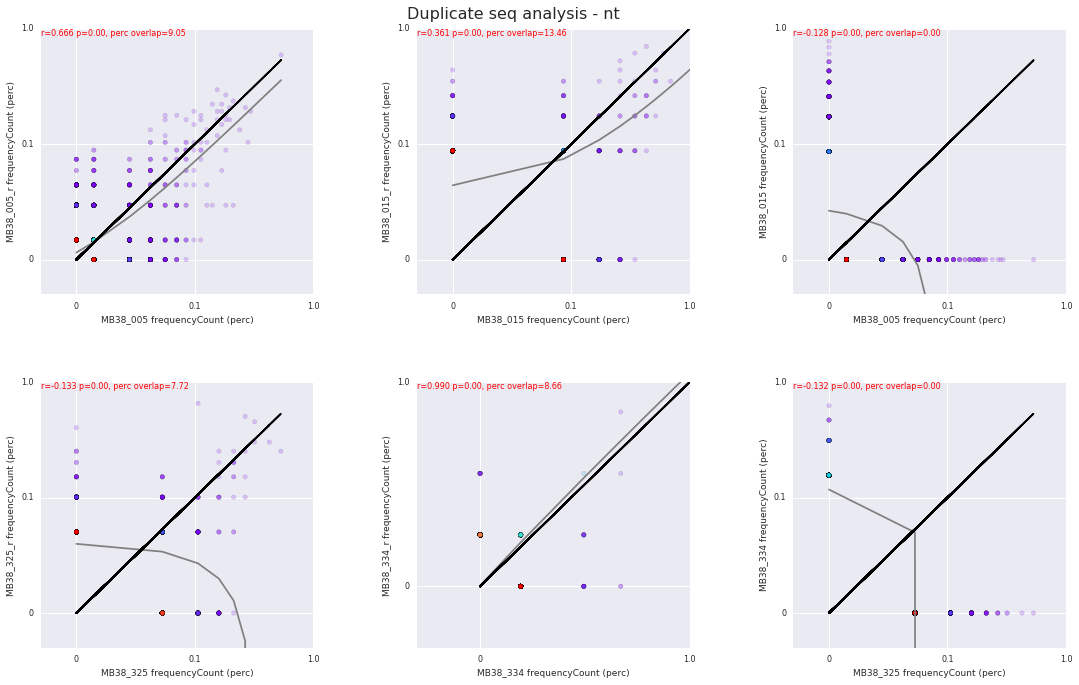

In [116]:
seqType='nt'
color='density'


fig1, ((ax1, ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3, figsize=(16,10),sharex=False, sharey=False)
fig1.suptitle('Duplicate seq analysis - %s' %seqType, fontsize=16)

sample_dup_analysis('MB38_005','MB38_005_r', seqType, color,ax1)
sample_dup_analysis('MB38_015','MB38_015_r', seqType, color, ax2)
sample_dup_analysis('MB38_005','MB38_015', seqType, color, ax3)
print 'first 3 are done'

sample_dup_analysis('MB38_325','MB38_325_r', seqType, color, ax4)
sample_dup_analysis('MB38_334','MB38_334_r', seqType, color, ax5)
sample_dup_analysis('MB38_325','MB38_334', seqType, color, ax6)
print 'first 6 are done'

fig1.subplots_adjust(left=0.09, right=0.98, top=0.95, bottom=0.09, wspace=0.38,hspace=0.33)
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/dup_comparisons_%s_%s' %(seqType, color)
fig1.savefig(filename=filename, dpi=200)
plt.show()

In [ ]:
seqType='nt'
color='density'


fig1, ((ax1, ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))= plt.subplots(nrows=4,ncols=3, figsize=(12,16),sharex=False, sharey=False)
fig1.suptitle('Duplicate seq analysis - %s' %seqType, fontsize=16)

sample_dup_analysis('BD317','BD317_2', seqType, color,ax1)
sample_dup_analysis('BD761_1','BD761_2', seqType, color, ax2)
sample_dup_analysis('BD714_1','BD714_2', seqType, color, ax3)
print 'first 3 are done'

sample_dup_analysis('BD702_1','BD702_2', seqType, color, ax4)
sample_dup_analysis('BD696_1','BD696_2', seqType, color, ax5)
sample_dup_analysis('BD671_1','BD671_2', seqType, color, ax6)
print 'first 6 are done'


sample_dup_analysis('BD650_1','BD650_2', seqType, color, ax7)
sample_dup_analysis('BD617_1','BD617_2', seqType, color, ax8)
sample_dup_analysis('BD574_1','BD574_2', seqType, color, ax9)
print 'first 9 are done'


sample_dup_analysis('BD457','BD457_2',seqType, color, ax10)
sample_dup_analysis('BD450','BD450_2', seqType, color, ax11)
# sample_dup_analysis('BD317','BD317_2', seqType, color, ax12)

fig1.subplots_adjust(left=0.09, right=0.98, top=0.95, bottom=0.09, wspace=0.38,hspace=0.33)
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/dup_comparisons_%s_%s' %(seqType, color)
fig1.savefig(filename=filename, dpi=200)
plt.show()

In [ ]:
seqType='nt'
color='density'


fig1, ((ax1, ax2),(ax3,ax4))=  plt.subplots(nrows=2,ncols=2, figsize=(12,12),sharex=False, sharey=False)
fig1.suptitle('Duplicate seq analysis - %s' %seqType, fontsize=16)

sample_dup_analysis('Ravid1_05ug','Ravid1_1ug', seqType, color,ax1)
sample_dup_analysis('Ravid2_05ug','Ravid2_1ug', seqType, color, ax2)


sample_dup_analysis('Ravid1_05ug','Ravid2_05ug', seqType, color,ax3)
sample_dup_analysis('Ravid1_1ug','Ravid2_1ug', seqType, color, ax4)


fig1.subplots_adjust(left=0.09, right=0.98, top=0.95, bottom=0.09, wspace=0.38,hspace=0.33)
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/dup_comparisons_%s_%s' %(seqType, color)
fig1.savefig(filename=filename, dpi=200)
plt.show()

In [ ]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/dup analysis dfs'
dupComparisonAll=concat_summarizing_dfs(dfs_folder)

In [ ]:
dupComparisonAll.sort_values(by='r',ascending=False)

In [ ]:
dupComparisonAll.groupby('seqType').mean()

## comparing replicates from the same PCR plate
in plate 6, we sequences the same PCR products twice (run1 and run2, two different pools of the same samples)

In [ ]:
only32004=SampleOverviewAndQC[SampleOverviewAndQC['SeqRun']=='plate6run1']

In [ ]:
plate6_sample_list=list(only32004.index)

print len(plate6_sample_list)

In [107]:
def replication_importance_analysis(sample_name1):
    
    sample_name2=sample_name1+'_1'
    df1=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" %sample_name1)
    df2=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/%s.tsv" %sample_name2)
    column1='%s frequencyCount (perc)' %sample_name1
    column2='%s frequencyCount (perc)' %sample_name2
    
    df1nt=df1[['nucleotide','frequencyCount (%)']]
    df1nt=df1nt.set_index('nucleotide')
    df1nt=df1nt.rename(columns={'frequencyCount (%)':column1})
    df2nt=df2[['nucleotide','frequencyCount (%)']]
    df2nt=df2nt.set_index('nucleotide')
    df2nt=df2nt.rename(columns={'frequencyCount (%)':column2})
    df1df2=pd.merge(df1nt, df2nt, how='outer', left_index=True, right_index=True)
    
    
    n_total_seqs=len(df1df2)
    n_overlap=len(df1df2[(df1df2[column1].notnull())&(df1df2[column2].notnull())])
    perc_overlap=round(float(n_overlap)*100/n_total_seqs,2)
    
    n_sample1=len(df1)
    n_sample2=len(df2)
    perc_added=round(float(n_total_seqs)/np.mean([n_sample1,n_sample2]),2)

    data1=df1df2[column1].fillna(0)
    data2=df1df2[column2].fillna(0)
    r,p=MyPearsonr(data1,data2)

    clonal_limit=0.02 # change if necessary
    noreplication1=df1df2[(df1df2[column1]>clonal_limit)&(df1df2[column2].isnull())]
    noreplication2=df1df2[(df1df2[column1].isnull())&(df1df2[column2]>clonal_limit)]

    ## generate summarizing df:
    summaryDF=pd.DataFrame()
    summaryDF.loc[1,'Sample']=sample_name1
    summaryDF.loc[1,'n seq1']=n_sample1
    summaryDF.loc[1,'n seq2']=n_sample2
    summaryDF.loc[1,'n total']=n_total_seqs
    summaryDF.loc[1,'perc added']=perc_added
    summaryDF.loc[1,'r seq freqs']=r
    summaryDF.loc[1,'perc_overlap']=perc_overlap
    summaryDF.loc[1,'n clonal missed']=len(noreplication1)+len(noreplication2)

    df_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/plate6_replicate_analysis/sample_%s_df' %sample_name1
    summaryDF.to_pickle(df_file)
    

In [ ]:
for n, sample_name1 in enumerate(plate6_sample_list):
    print n,sample_name1
    replication_importance_analysis(sample_name1)
    

In [ ]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/plate6_replicate_analysis'
plate6_replicate_analysis_df=concat_summarizing_dfs(dfs_folder)

In [ ]:
plate6_replicate_analysis_df.mean()

In [ ]:
plate6_replicate_analysis_df.sort_values(by='perc added',ascending=False)

In [ ]:
plate6_replicate_analysis_df[plate6_replicate_analysis_df['n clonal missed']>0]

## checking the effect of the cleaning method

In [ ]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverviewAndQC'
SampleOverviewAndQC=pd.read_pickle(file1)

In [ ]:
SampleOverviewAndQC.tail()

In [ ]:
SampleOverviewAndQC.loc['BD447',:]

In [ ]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/cleanUpMethodSummary_plates1-3.xlsx'
cleanUpMethodSummary_plates123=pd.read_excel(file1)

In [ ]:
cleanUpMethodSummary_plates123.head()

In [ ]:
cleanUpMethodSummary_plates123=cleanUpMethodSummary_plates123.set_index('Sample name')

In [ ]:
SampleOverviewAndQC_withCleanInfo=pd.merge(SampleOverviewAndQC,cleanUpMethodSummary_plates123,how='left', left_index=True,
                                          right_index=True)

In [ ]:
SampleOverviewAndQC_withCleanInfo

In [ ]:
SampleOverviewAndQC_withCleanInfo.groupby('CleanUpMethod').mean()

In [ ]:
SampleOverviewAndQC_withCleanInfo.groupby(['Group','CleanUpMethod']).mean()

In [ ]:
SampleOverviewAndQC_withCleanInfo.groupby(['SeqRun','CleanUpMethod']).mean()

## checking correlation between sample concentration before PCR and other parameters

In [ ]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BloodDNASamplesCleaningInfoUpdated200817_4'
SampleData=pd.read_pickle(file1)

In [ ]:
SampleOverviewAndQC.head()

In [ ]:
 newf1=re.sub("\w+\-\w+BD", "BD", file_name)

In [ ]:
for n in SampleOverviewAndQC.index:
    SampleOverviewAndQC.loc[n,'DnaIDindex']=re.sub("\w+\BD", "", str(n))
#     SampleOverviewAndQC.loc[n,'DnaIDindex']=re.sub("BD", "", str(n))
SampleOverviewAndQC

In [ ]:
SampleData.head()

In [ ]:
sampleDNAConc=SampleData[['DnaID','ng/ul after cleanUp']]
sampleDNAConc=sampleDNAConc.set_index('DnaID')
for n in sampleDNAConc.index:
#    sampleDNAConc.loc[n,'DnaIDindex']=re.sub("\w+\BD", "", str(n))
     sampleDNAConc.loc[n,'DnaIDindex']=re.sub("BD", "", str(n))
sampleDNAConc=sampleDNAConc.reset_index()
sampleDNAConc=sampleDNAConc.set_index('DnaIDindex')

sampleDNAConc

In [ ]:
SampleOverviewAndQC=SampleOverviewAndQC.reset_index()
SampleOverviewAndQC=SampleOverviewAndQC.set_index('DnaIDindex')
SampleOverviewAndQC

In [ ]:
corrWithDNAconc=pd.merge(SampleOverviewAndQC,sampleDNAConc, how='left', right_index=True, left_index=True)
corrWithDNAconc

In [ ]:
print len(SampleOverviewAndQC)
print len(corrWithDNAconc)

In [ ]:
corrWithDNAconc.columns.values

In [ ]:
columns_to_keep=['sample_name', 'total_templates', 
       'fraction_productive', 'total_rearrangements',
       'sample_clonality', 'sample_entropy', 'max_frequency', 'Coverage', '% On-target',
       'putative n reads','ng/ul after cleanUp']

In [ ]:
corrWithDNAconc=corrWithDNAconc[columns_to_keep]

In [ ]:
p_corrected=0.05/len(corrWithDNAconc.columns.values)
p_corrected

In [ ]:
for column in corrWithDNAconc.columns.values[1:]:
    print column
    x=corrWithDNAconc[column]
    y=corrWithDNAconc['ng/ul after cleanUp']
    r,p=MyPearsonr(x,y)
    print r,p

### check this only on plate4pool1 samples:


In [ ]:
corrWithDNAconc=pd.merge(SampleOverviewAndQC,sampleDNAConc, how='left', right_index=True, left_index=True)
corrWithDNAconc

In [ ]:
onlyplate4pool1=corrWithDNAconc[corrWithDNAconc['SeqRun']=='plate4_pool1']

In [ ]:
onlyplate4pool1.columns.values

In [ ]:
columns_to_keep=['sample_name', 'total_templates', 
       'fraction_productive', 'total_rearrangements',
       'sample_clonality', 'sample_entropy', 'max_frequency', 'Coverage', '% On-target',
       'putative n reads','ng/ul after cleanUp']

In [ ]:
onlyplate4pool1=onlyplate4pool1[columns_to_keep]

In [ ]:
p_corrected=0.05/len(onlyplate4pool1.columns.values)
p_corrected

In [ ]:
for column in onlyplate4pool1.columns.values[1:]:
    print column
    x=onlyplate4pool1[column]
    y=onlyplate4pool1['ng/ul after cleanUp']
    r,p=MyPearsonr(x,y)
    print r,p

In [ ]:
onlyplate4pool1

In [ ]:
df=onlyplate4pool1
Tag='ng/ul after cleanUp'
PredictionR='total_templates'
ax=None
check_correlation_PredictionToTag(df,Tag,PredictionR,ax)
plt.show()

In [ ]:
df=onlyplate4pool1
Tag='ng/ul after cleanUp'
PredictionR='total_rearrangements'
ax=None
check_correlation_PredictionToTag(df,Tag,PredictionR,ax)
plt.show()

In [ ]:
df=corrWithDNAconc
Tag='ng/ul after cleanUp'
PredictionR='total_templates'
ax=None
check_correlation_PredictionToTag(df,Tag,PredictionR,ax)
plt.show()

In [ ]:
df=corrWithDNAconc
Tag='ng/ul after cleanUp'
PredictionR='total_rearrangements'
ax=None
check_correlation_PredictionToTag(df,Tag,PredictionR,ax)
plt.show()

In [ ]:
onlyhighconc=corrWithDNAconc[corrWithDNAconc['ng/ul after cleanUp']>50]

In [ ]:
df=onlyhighconc
Tag='ng/ul after cleanUp'
PredictionR='total_templates'
ax=None
check_correlation_PredictionToTag(df,Tag,PredictionR,ax)
plt.show()

In [ ]:
df=onlyhighconc
Tag='ng/ul after cleanUp'
PredictionR='total_rearrangements'
ax=None
check_correlation_PredictionToTag(df,Tag,PredictionR,ax)
plt.show()

# analyzing only samples that goes to real analysis

In [ ]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/Sample list for analysis.xlsx'
samplesForAnalysis=pd.read_excel(file1, sheet=0)

In [ ]:
samplesForAnalysis.head()

In [ ]:
columns_QC=['Coverage', '% On-target','putative n reads']
columns_samplesOverview=['total_templates','total_rearrangements','fraction_productive','max_frequency','sample_clonality',
                         'sample_entropy', 'productive_clonality','productive_entropy']

In [ ]:
print len(columns_samplesOverview)

In [ ]:
fig1, (ax1, ax2,ax3)=plt.subplots(nrows=1,ncols=3, figsize=(14,5),sharex=True, sharey=False)
fig1.suptitle('ONLY SAMPLES FOR ANALYSIS - QC parameters- SeqRun comparison', fontsize=16)
axList=[ax1,ax2,ax3]
count=0

for column in columns_QC:
    fig,ax,s,p=check_category_effect_on_PredictionR(df=samplesForAnalysis,category='SeqRun',PredictionR=column,ax=axList[count])
    count=count+1
    
fig1.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/ONLY SAMPLES FOR ANALYSIS - QC parameters- SeqRun comparison_%s' %cdate
fig1.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

In [ ]:
fig2, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7,ax8))= plt.subplots(nrows=2,ncols=4, figsize=(16,9),sharex=True, sharey=False)
fig2.suptitle('ONLY SAMPLES FOR ANALYSIS - Sample Overview - SeqRun comparison', fontsize=16)
axList=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
count=0

for column in columns_samplesOverview:
    print column
    fig,ax,s,p=check_category_effect_on_PredictionR(df=samplesForAnalysis,category='SeqRun',PredictionR=column,ax=axList[count])
    count=count+1
    
fig2.subplots_adjust(left=0.09, right=0.98, top=0.90, bottom=0.09, wspace=0.26,hspace=0.24)

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/ONLY SAMPLES FOR ANALYSIS - Sample Overview - SeqRun set comparison %s' %cdate
fig2.savefig(filename, bbox_inches='tight', dpi = 200)

plt.show()

    
    

In [ ]:
groupedBySeqrun=samplesForAnalysis.groupby('SeqRun').mean()
groupedBySeqrun

In [ ]:
nSamples_perRun=[26,31,48,48,48,48,48,94]

In [ ]:
groupedBySeqrun['nSamples_perRun']=nSamples_perRun

In [ ]:
groupedBySeqrun

In [ ]:
y=groupedBySeqrun['nSamples_perRun']
for column in groupedBySeqrun.columns.values[:-1]:
    print column
    x=groupedBySeqrun[column]
    r,p=MyPearsonr(x,y)
    print r,p
    
    

### check files in 'SamplesForAnalysis' folder

In [ ]:
dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis'
filenames = [f for f in listdir(dfs_folder) if isfile(join(dfs_folder, f))]
filenames=[f.strip('.tsv') for f in filenames]

print len(filenames)
    

In [ ]:
sample_list=list(samplesForAnalysis['sample_name'])
print len(sample_list)

In [ ]:
errors=[sample for sample in filenames if sample not in sample_list]
errors

In [ ]:
missing=[sample for sample in sample_list if sample not in filenames]
missing

# compare QA parameters between cardio_plate8 and all others

In [ ]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/SampleOverviewAndQC.xlsx'
SampleOverviewAndQC=pd.read_excel(file1)
SampleOverviewAndQC.head()

In [ ]:
#get cardio samples only:
cardio_plate8_df=SampleOverviewAndQC.loc[plate8_cardio,:]
print len(cardio_plate8_df)

In [ ]:
# get pnp490 cohort samples names - old samples names!
folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/SamplesForAnalysis'
PNP490_oldNames= [f for f in listdir(folder) if isfile(join(folder, f))]
PNP490_oldNames=[sample.replace('.tsv','') for sample in PNP490_oldNames]

In [ ]:
'BD702' in PNP490_oldNames

In [ ]:
'BD702_2' in PNP490_oldNames

In [ ]:
#get pnp samples only::
pnp=SampleOverviewAndQC.loc[PNP490_oldNames,:]
print len(pnp)

In [ ]:
pnp.head()

In [ ]:
pnp['total_templates'].mean()

In [ ]:
interesting_columns=['Coverage','% On-target','total_templates']
fig1=plt.figure(figsize=(15,4))
fig1.suptitle('QC parameters comparison: PNP490 vs. cardio_plate8', fontsize=22)
datasetName1='PNP490'
datasetName2='cardio_plate8'


for n,column in enumerate(interesting_columns):
    ax= fig1.add_subplot(1,3,n+1)
    plot_feature_comparison(column,ax,datasetName1,pnp,datasetName2,cardio_plate8_df)
#     ax.set_yscale('log')
    if n==2:
        ax.legend(bbox_to_anchor=(1.01, 0.95), loc='upper left', borderaxespad=0.,fontsize=16)
    
fig1.subplots_adjust(left=0.09, right=0.98, top=0.8, bottom=0.02, wspace=0.22,hspace=0.28)
        
plt.show()

filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/QC/QC_parameter_caomprison_%s_%s' %(datasetName1,datasetName2)
fig1.savefig(filename, bbox_inches='tight', dpi = 200)

In [ ]:
fig,ax=plt.subplots()
column='total_templates'
datasetName1='PNP490'
datasetName2='cardio_plate8'
cohort1_allFeatures=pnp
cohort2_allFeatures=cardio_plate8_df

plot_feature_comparison(column,ax,datasetName1,pnp,datasetName2,cardio_plate8_df)
plt.show()

In [ ]:
fig,ax=plt.subplots()
feature='total_templates'
datasetName1='PNP490'
cohort1_allFeatures=pnp


cohort1data=cohort1_allFeatures[feature]
cohort1data=list(cohort1data[~np.isnan(cohort1data)])
cohort1weights=np.ones_like(cohort1data)/len(cohort1data)
print cohort1weights[:10]
# cohort2data=cohort2_allFeatures[feature]
# cohort2data=list(cohort2data[~np.isnan(cohort2data)])
# cohort2weights=np.ones_like(cohort2data)/len(cohort2data)  

FeatureMeans_dataset1=np.mean(cohort1data)
# FeatureMeans_dataset2=np.mean(cohort2data)


fig = plt.figure()
if ax==None:
    fig,ax=plt.subplots()

plot=ax.hist(cohort1data, bins=50, color='black',label=datasetName1, alpha=0.7)
#, weights=cohort1weights,

print cohort1data[:10]


ax.annotate('mean=%s' %round(FeatureMeans_dataset1,3),
            xy=(0.96, 0.95), xycoords='axes fraction', fontsize=9, horizontalalignment='right', verticalalignment='top', fontweight='bold')

ax.set_title(feature, fontsize=16,fontweight='bold')
ax.set_ylabel('Frequency',fontsize=9)
plt.show()

In [ ]:
fig,ax=plt.subplots()
feature='total_templates'
datasetName1='PNP490'
cohort1_allFeatures=pnp


cohort1data=cohort1_allFeatures[feature]
cohort1data=list(cohort1data[~np.isnan(cohort1data)])
cohort1weights=np.ones_like(cohort1data,dtype=np.float)/len(cohort1data)
print np.ones_like(cohort1data)[:10]
print len(cohort1data)
print cohort1weights[:10]
cohort2data=cohort2_allFeatures[feature]
cohort2data=list(cohort2data[~np.isnan(cohort2data)])
cohort2weights=np.ones_like(cohort2data)/len(cohort2data)
print np.ones_like(cohort2data)[:10]
print len(cohort2data)
print cohort2weights[:10]